<a href="https://colab.research.google.com/github/farnazmnz/Multi-Class-Weather/blob/main/DL_Guilan_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d pratik2901/multiclass-weather-dataset

multiclass-weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

D:  kaggle.json  multiclass-weather-dataset.zip


In [ ]:
!unzip -u "multiclass-weather-dataset.zip" -d "/content/drive/My Drive/deeplearning"

Archive:  multiclass-weather-dataset.zip


In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt



In [ ]:
max_height = -1
max_width =-1

In [ ]:
images = []
labels = []
data=[]
convert = {'Cloudy':0, 'Rain':1, 'Shine':2, 'Sunrise':3}#list
print(convert)
path = "/content/drive/My Drive/deeplearning/Multi-class Weather Dataset"

print(os.listdir(path))
for filename in os.listdir(path):
  for filename1 in os.listdir(path+'/'+filename):
      img = cv2.imread(path+'/'+filename+'/'+filename1)

      if img is not None:

         # print(img.shape)
         # print(img.size)
          img=cv2.resize(img,(250,250))
         # print(img.size)
          #print(img.shape)
          images.append(img)
          labels.append(convert[filename])
          data.append([img,convert[filename]])
          max_height = max(max_height, img.shape[0])
          max_width = max(max_width, img.shape[1])
print(labels)

#print(data[0])

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}
['Cloudy', 'Rain', 'Shine', 'Sunrise']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 

In [ ]:
print(max_height)
print(max_width)


250
250


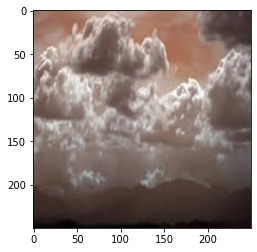

(250, 250, 3)


In [ ]:

img = images[100]
#pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))
pyplot.imshow(img)
# show the figure
pyplot.show()
print(img.shape)




In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# split data set (20% test, 80% train)

In [ ]:
from sklearn.model_selection import train_test_split
x=[]
y=[]
for image,label in data:
     x.append(image)
     y.append(label)


X = np.array(x)
Y = np.array(y)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=12)


In [ ]:
print("shape of x_train :",x_train.shape)
print("shape of y_train :",y_train.shape)
print("shape of x_valid :",x_val.shape)
print("shape of y_valid :",y_val.shape)

shape of x_train : (898, 250, 250, 3)
shape of y_train : (898,)
shape of x_valid : (225, 250, 250, 3)
shape of y_valid : (225,)


In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import  BatchNormalization
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import  BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Activation,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_val = tf.keras.utils.normalize(x_val, axis=1)  # scales data between 0 and 1

## data augmentation

In [ ]:
base_dir =  "/content/drive/My Drive/deeplearning/Multi-class Weather Dataset"


train_datagen = ImageDataGenerator(rescale=1./255,#RGB coefficients in the 0-255,so we target values between 0 and 1 instead by scaling with a 1/255.
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,#is for randomly applying shearing transformations
    zoom_range=0.2,
    horizontal_flip=True,# is for randomly flipping half of the images horizontally
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size=(250 , 250),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size=(250, 250),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# Fully Connected

## 3 Layer Fully connected

Epoch 1/20
90/90 [==============================] - 1s 12ms/step - loss: 1.2486 - accuracy: 0.4365 - val_loss: 1.0916 - val_accuracy: 0.5067
Epoch 2/20
90/90 [==============================] - 1s 9ms/step - loss: 1.0715 - accuracy: 0.5401 - val_loss: 0.9961 - val_accuracy: 0.5956
Epoch 3/20
90/90 [==============================] - 1s 8ms/step - loss: 1.0066 - accuracy: 0.5802 - val_loss: 0.9580 - val_accuracy: 0.6089
Epoch 4/20
90/90 [==============================] - 1s 9ms/step - loss: 0.9322 - accuracy: 0.6169 - val_loss: 0.8861 - val_accuracy: 0.6578
Epoch 5/20
90/90 [==============================] - 1s 9ms/step - loss: 0.8627 - accuracy: 0.6526 - val_loss: 0.9440 - val_accuracy: 0.5733
Epoch 6/20
90/90 [==============================] - 1s 9ms/step - loss: 0.7969 - accuracy: 0.7071 - val_loss: 0.8073 - val_accuracy: 0.7022
Epoch 7/20
90/90 [==============================] - 1s 9ms/step - loss: 0.7549 - accuracy: 0.7227 - val_loss: 0.9404 - val_accuracy: 0.5778
Epoch 8/20
90/90 [=

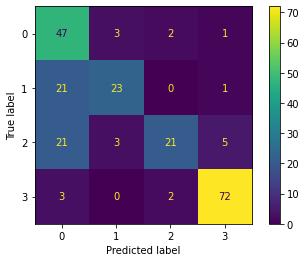

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 0 2 0 0 1 3 2 1 1 1 3 3 2 0 0 0 1 0 0 3 1 1 0 1 3 0 0 3 0 3 3
 3 1 0 3 1 3 3 0 3 1 0 1 2 0 0 0 2 1 0 2 3 0 0 1 3 0 3 1 3 3 0 0 0 0 3 0 2
 3 0 0 2 3 0 3 3 2 3 2 1 0 0 0 0 3 0 3 1 2 1 0 1 0 2 0 0 0 0 3 1 1 1 0 0 2
 2 0 3 3 2 0 0 3 0 3 0 1 0 0 0 0 3 3 2 2 3 3 3 0 0 0 3 0 3 0 0 2 2 0 0 3 0
 0 1 0 0 1 1 0 2 0 1 3 0 0 0 2 0 3 3 0 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 0 0 1 0 0 2 3 1 0 3 0 1 3 3 3 1 3 0 0 3 2 2 0 3 2 0 1 0 0 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 2 0 1 3 3 3 1 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 1 0 0 0
 3 0 3 1 3 3 1 1 0 0 1 3 3 0 0 3 0 1 2 0 3 0 1 0 0 1 0 3 0 0 0 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 3 3 2 0 3 3 2 1 3 1 3 0 0 0 0 0 0 0 0 0 2 1 3 0 3 0 0 2
 0 3 2 2 0 0 3 0 1 0 1 2 0 1 0 0 0 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 0 3 3 3
 0 3 2 2 3 0 0 3 2 3 3 3 0 0 0 1 3 1 0 3 3 1 3 3 2 2 0 0 0 0 0 0 2 3 3 3 0
 2 3 3 0 0 0 0 0 0 3 3 2 0 0 0 3 0 0 1 3 0 1 3 0 0 1 2 0 0 0 3 1 3 0 1 3 0
 0 3 3 1 0 2 3 3 0 1 0 1 3 0 3 1 0 0 0 3 1 0 3 3 0 3 3 0 1 0 2 0 3 0 1 

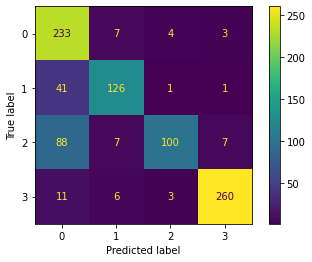

precision :  0.7638413546391362
recall :  0.6882421247515587
f1_score : 0.6882436016918775

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


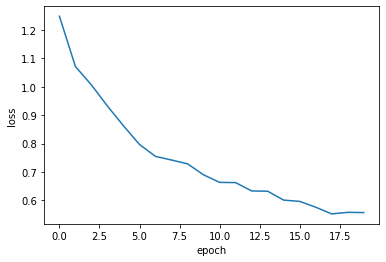

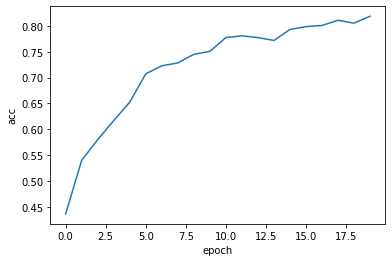

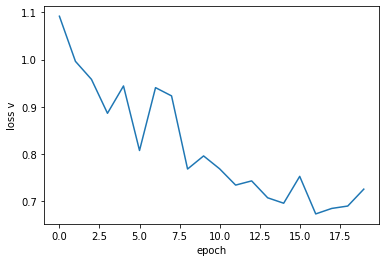

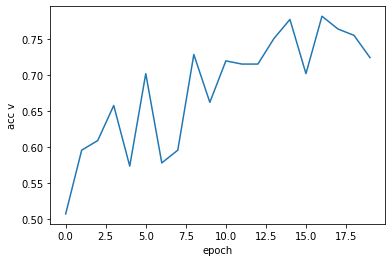

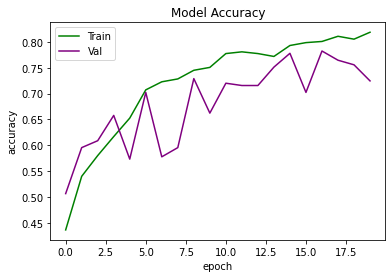

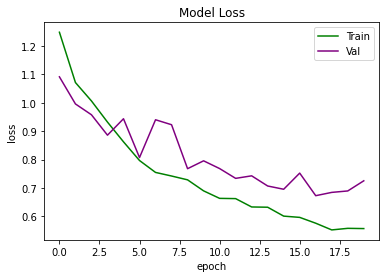

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(opt,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#predict on train set
y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 3 Layer Fully connected Dropout

In [ ]:
'''model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()'''

'model = Sequential()  # a basic feed-forward model\nmodel.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784\nmodel.add(Dense(64, activation=\'relu\'))\n#model.add(Dropout(0.1))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(4, activation=\'softmax\'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution\n\nopt = tf.keras.optimizers.Adam(learning_rate=0.001)\n\nmodel.compile(opt,  # Good default optimizer to start with\n              loss=\'sparse_categorical_crossentropy\',  # how will we calculate our "error." Neural network aims to minimize loss.\n              metrics=[\'accuracy\'])  # what to track\n\nhistory=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model\n\n#predict on valid set \ny_predict=model.predict(x_val)\nprint(y_predict.shape)\n\n# returning Indices of the max element(because yval is (96,1) to compare output with yval we need cha

## 3 Layer Fully connected data augmentation

Epoch 1/20
29/29 [==============================] - 24s 826ms/step - loss: 2.6412 - accuracy: 0.4195 - val_loss: 1.3708 - val_accuracy: 0.4821
Epoch 2/20
29/29 [==============================] - 22s 757ms/step - loss: 0.9664 - accuracy: 0.5949 - val_loss: 1.1440 - val_accuracy: 0.5804
Epoch 3/20
29/29 [==============================] - 22s 758ms/step - loss: 0.9452 - accuracy: 0.6360 - val_loss: 1.0428 - val_accuracy: 0.6205
Epoch 4/20
29/29 [==============================] - 22s 763ms/step - loss: 1.0007 - accuracy: 0.6293 - val_loss: 0.9772 - val_accuracy: 0.6205
Epoch 5/20
29/29 [==============================] - 23s 806ms/step - loss: 1.0243 - accuracy: 0.6193 - val_loss: 1.1114 - val_accuracy: 0.6562
Epoch 6/20
29/29 [==============================] - 23s 792ms/step - loss: 0.9176 - accuracy: 0.6415 - val_loss: 0.8771 - val_accuracy: 0.6696
Epoch 7/20
29/29 [==============================] - 22s 787ms/step - loss: 1.0331 - accuracy: 0.6260 - val_loss: 0.9085 - val_accuracy: 0.6384

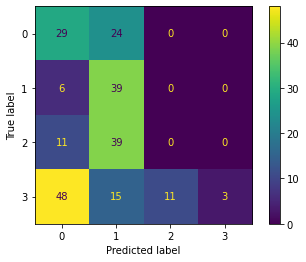

(898, 4)
(898,)
y_predict =  [1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 3 1 1 0 1 1 1 1 1 0 0 1
 0 0 0 2 1 2 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 2 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 2 1 1 0 1 0 0 2 1 1 0 1 1 1 0 0 1 1 1 0 2 0 1 1 1 0 2 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 1 3 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 2 3 1 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0 0 0 2 1 1 0 1 1 1 1
 1 0 2 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 2 1 1 1 0 0 1 1 2 1 2 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 2 1
 0 2 1 1 0 1 0 0 1 0 0 2 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 2 0 1 1 0
 0 0 2 1 1 1 1 1 1 1 1 0 0 0 2 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 

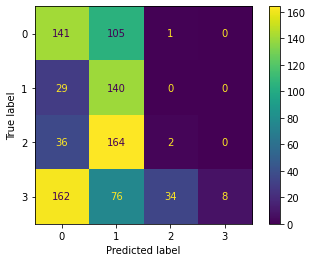

precision :  0.4104609929078014
recall :  0.3631993792371151
f1_score : 0.23775982615268332

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


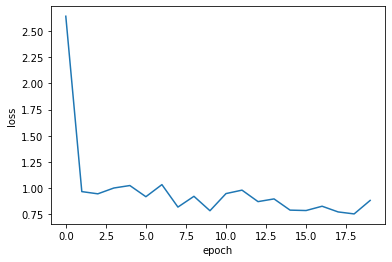

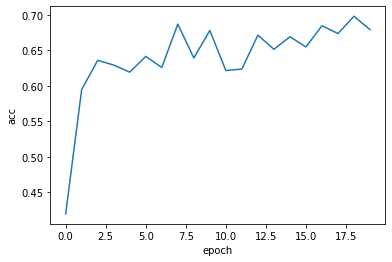

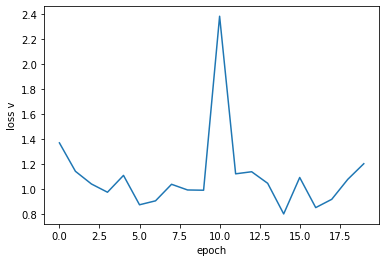

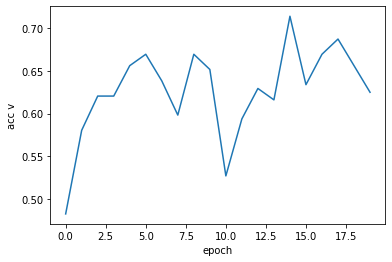

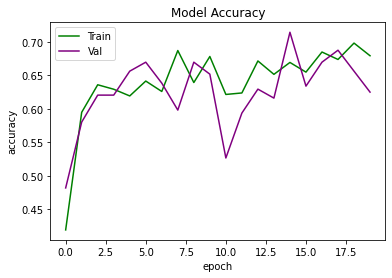

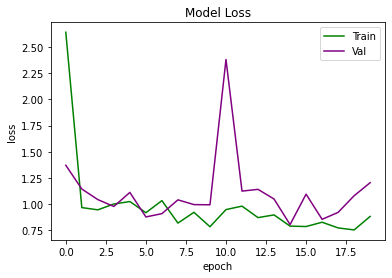

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          batch_size=10 # valid_files/batch_size
          )
#history = model.fit(train_generator , epochs=20 , validation_data=validation_generator, batch_size=10)

#history=model.fit(x_train , y_train,validation_data= validation_generator, batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 5 Layer Fully connected

Epoch 1/20
90/90 [==============================] - 2s 15ms/step - loss: 1.5514 - accuracy: 0.3920 - val_loss: 1.1786 - val_accuracy: 0.4711
Epoch 2/20
90/90 [==============================] - 1s 11ms/step - loss: 1.1569 - accuracy: 0.4933 - val_loss: 1.0966 - val_accuracy: 0.5200
Epoch 3/20
90/90 [==============================] - 1s 11ms/step - loss: 1.0138 - accuracy: 0.5835 - val_loss: 0.9496 - val_accuracy: 0.6978
Epoch 4/20
90/90 [==============================] - 1s 12ms/step - loss: 0.9552 - accuracy: 0.6013 - val_loss: 0.8916 - val_accuracy: 0.6133
Epoch 5/20
90/90 [==============================] - 1s 11ms/step - loss: 0.8068 - accuracy: 0.6737 - val_loss: 0.9586 - val_accuracy: 0.6178
Epoch 6/20
90/90 [==============================] - 1s 11ms/step - loss: 0.7690 - accuracy: 0.6893 - val_loss: 0.8824 - val_accuracy: 0.6844
Epoch 7/20
90/90 [==============================] - 1s 11ms/step - loss: 0.7480 - accuracy: 0.7149 - val_loss: 0.8977 - val_accuracy: 0.6444
Epoch 8/20
90

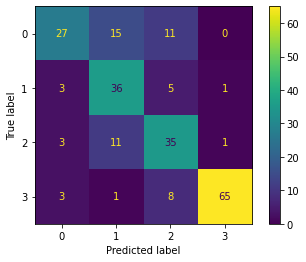

(898, 4)
(898,)
y_predict =  [1 3 1 3 2 3 2 3 1 1 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 2 3 1 0 3 0 3 3
 3 3 0 3 1 3 3 1 3 1 0 1 2 2 0 1 1 1 0 1 3 1 0 1 3 1 3 0 3 3 2 0 2 1 3 1 2
 3 0 1 2 3 0 3 1 2 3 2 1 1 0 2 2 3 0 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 1 1 2
 2 0 3 3 2 1 2 3 3 3 1 1 3 3 2 0 3 2 2 2 3 3 3 2 0 2 3 1 3 2 1 2 2 0 1 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 1 3 3 1 3 0 0 0 3 3 3 1 1 2 3 3 1 2 0 2 3 0
 2 0 1 2 0 2 3 1 0 3 0 0 3 3 3 1 3 1 2 3 1 2 0 3 1 0 0 0 2 1 0 3 0 1 0 3 1
 3 3 0 3 3 3 0 1 3 0 1 0 1 3 3 3 2 0 1 1 1 3 0 2 1 2 3 3 2 1 0 1 1 3 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 1 3 0 1 1 0 1 0 3 0 3 3 1 0 3 0 3 1
 1 1 0 3 0 1 2 3 0 0 3 2 2 3 3 2 1 2 0 3 0 0 1 0 0 0 0 0 0 1 1 3 2 3 1 2 2
 0 3 2 2 0 0 3 1 1 2 1 3 0 0 0 1 1 2 3 2 1 0 0 1 1 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 2 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 2 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 2 2 3 3 0 0 0 2 3 0 2 1 3 0 1 3 1 0 1 2 0 0 1 2 1 3 2 1 3 0
 1 2 3 1 0 2 3 3 2 1 0 1 3 0 0 1 0 1 2 3 1 0 3 3 0 3 2 0 1 1 2 2 0 0 1 

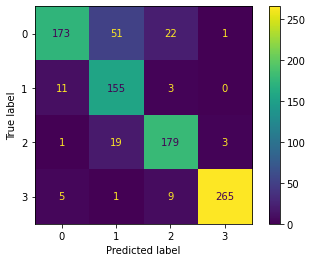

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       247
           1       0.69      0.92      0.78       169
           2       0.84      0.89      0.86       202
           3       0.99      0.95      0.97       280

    accuracy                           0.86       898
   macro avg       0.86      0.86      0.85       898
weighted avg       0.88      0.86      0.86       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


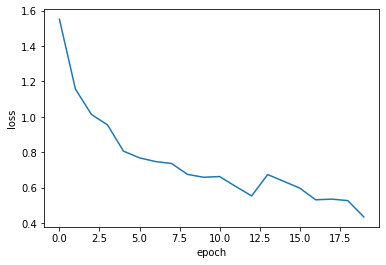

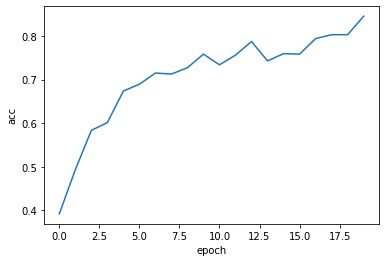

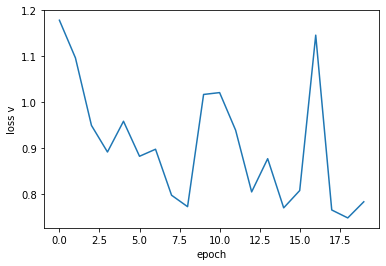

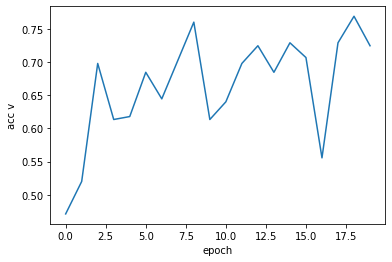

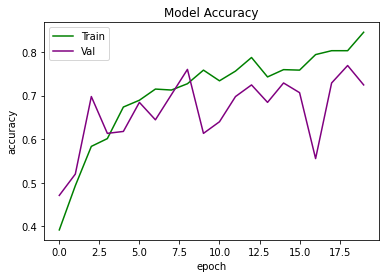

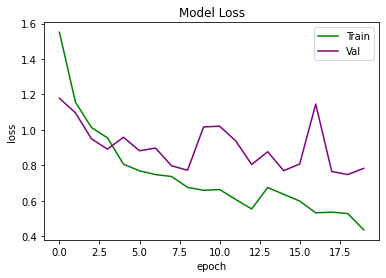

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 5 Layer Fully connected Dropout

In [ ]:
'''model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()'''

'model = Sequential()  # a basic feed-forward model\nmodel.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784\nmodel.add(Dense(128, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dropout(0.1))\nmodel.add(Dense(64, activation=\'relu\'))\n#model.add(Dropout(0.1))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(4, activation=\'softmax\'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution\n\nopt = tf.keras.optimizers.Adam(learning_rate=0.001)\n\nmodel.compile(opt ,  # Good default optimizer to start with\n              loss=\'sparse_categorical_crossentropy\',  # how will we calculate our "error." Neural network aims to minimize loss.\n              metrics=[\'accuracy\'])  # what to track\n\nhistory=model.fit(x_train , y_train

## 5 Layer Fully connected data

Epoch 1/20
29/29 [==============================] - 22s 754ms/step - loss: 1.3564 - accuracy: 0.5139 - val_loss: 0.9994 - val_accuracy: 0.6607
Epoch 2/20
29/29 [==============================] - 22s 738ms/step - loss: 0.6197 - accuracy: 0.7647 - val_loss: 0.8786 - val_accuracy: 0.7009
Epoch 3/20
29/29 [==============================] - 21s 714ms/step - loss: 0.6604 - accuracy: 0.7492 - val_loss: 0.7967 - val_accuracy: 0.6518
Epoch 4/20
29/29 [==============================] - 20s 708ms/step - loss: 0.5872 - accuracy: 0.7703 - val_loss: 0.8048 - val_accuracy: 0.7411
Epoch 5/20
29/29 [==============================] - 20s 721ms/step - loss: 0.5731 - accuracy: 0.7658 - val_loss: 0.7035 - val_accuracy: 0.7589
Epoch 6/20
29/29 [==============================] - 20s 707ms/step - loss: 0.5099 - accuracy: 0.8047 - val_loss: 0.7025 - val_accuracy: 0.7589
Epoch 7/20
29/29 [==============================] - 20s 719ms/step - loss: 0.5407 - accuracy: 0.7847 - val_loss: 1.0239 - val_accuracy: 0.6830

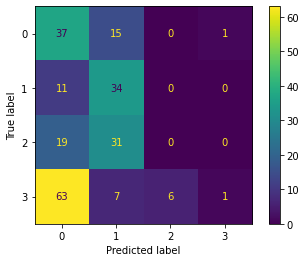

(898, 4)
(898,)
y_predict =  [1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 2 1 1 1 2 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 2 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 2 0 0 0 0 3 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 2 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 2 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 2 1 1 0 1 0 0 0 1 1 1 2 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 0 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 2 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 2 0 1 1 0 0 0 1 0 0 1 1 0 2 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 

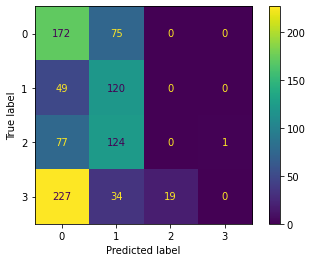

              precision    recall  f1-score   support

           0       0.33      0.70      0.45       247
           1       0.34      0.71      0.46       169
           2       0.00      0.00      0.00       202
           3       0.00      0.00      0.00       280

    accuracy                           0.33       898
   macro avg       0.17      0.35      0.23       898
weighted avg       0.15      0.33      0.21       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


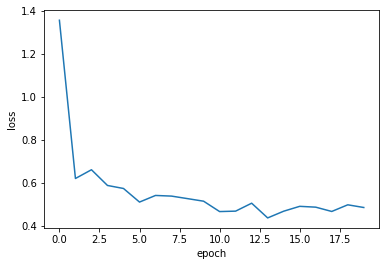

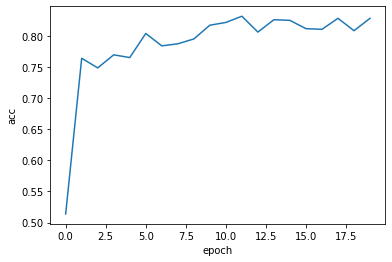

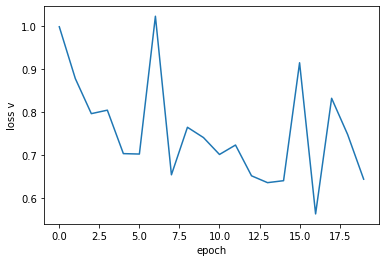

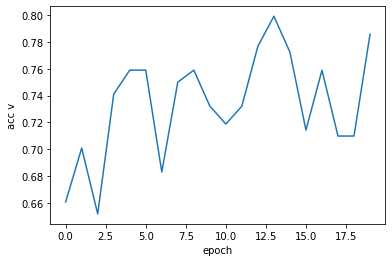

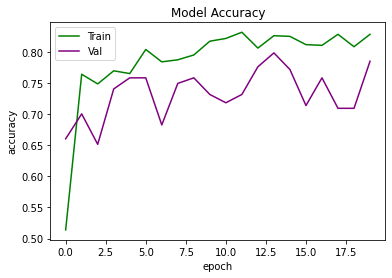

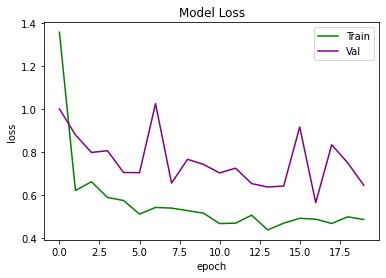

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()



## 7 Layer Fully connected

Epoch 1/20
90/90 [==============================] - 2s 15ms/step - loss: 1.3642 - accuracy: 0.3708 - val_loss: 1.0522 - val_accuracy: 0.5733
Epoch 2/20
90/90 [==============================] - 1s 12ms/step - loss: 1.1318 - accuracy: 0.4989 - val_loss: 1.2064 - val_accuracy: 0.4711
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 0.9680 - accuracy: 0.5924 - val_loss: 0.8747 - val_accuracy: 0.6044
Epoch 4/20
90/90 [==============================] - 1s 12ms/step - loss: 0.8670 - accuracy: 0.6392 - val_loss: 0.9490 - val_accuracy: 0.5867
Epoch 5/20
90/90 [==============================] - 1s 12ms/step - loss: 0.8072 - accuracy: 0.6726 - val_loss: 0.8910 - val_accuracy: 0.6800
Epoch 6/20
90/90 [==============================] - 1s 12ms/step - loss: 0.8254 - accuracy: 0.6537 - val_loss: 0.9995 - val_accuracy: 0.6089
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 0.7766 - accuracy: 0.6860 - val_loss: 0.8794 - val_accuracy: 0.6267
Epoch 8/20
90

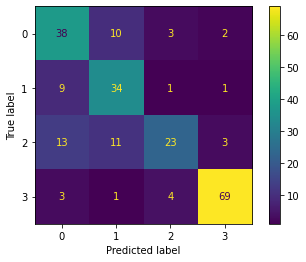

(898, 4)
(898,)
y_predict =  [1 3 1 3 2 3 2 3 1 1 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 0 1 2 2 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 0 2 0 0 1 1 0 0 1 3 1 0 1 3 0 3 0 3 3 2 0 2 1 3 1 2
 3 0 0 2 3 0 3 1 2 3 2 1 0 0 2 3 3 0 3 1 0 1 0 0 1 2 0 0 0 0 3 1 1 0 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 1 3 3 2 2 3 3 3 2 0 2 3 1 3 3 1 2 2 0 1 3 0
 3 1 0 0 1 1 0 2 0 0 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 1 1 2 3 3 1 3 0 1 3 0
 2 0 1 2 0 3 3 1 0 3 0 0 3 3 3 0 3 1 2 3 1 0 0 3 1 0 0 0 2 1 0 3 0 1 0 3 1
 3 3 0 3 3 3 0 1 3 0 1 0 1 3 3 3 1 0 1 1 1 3 3 0 0 0 3 3 3 3 0 1 0 1 1 0 2
 3 0 3 0 3 3 0 1 0 1 0 2 2 2 2 3 3 0 2 0 3 0 1 1 0 1 0 3 0 3 3 1 0 3 0 3 1
 1 1 0 3 1 1 1 1 0 0 3 2 2 3 3 2 1 2 0 3 0 0 1 0 0 0 0 0 0 1 1 3 2 3 1 2 2
 0 3 2 2 0 0 3 1 1 2 1 3 0 0 0 0 1 2 3 0 1 0 0 1 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 0 3 0 0 3 2 3 0 3 2 0 2 0 3 2 2 3 3 1 3 3 1 2 1 3 0 0 2 2 1 2 3 3 0
 2 3 3 0 0 0 0 2 2 3 3 0 0 0 2 3 0 0 1 3 0 1 3 0 0 0 2 0 0 1 2 0 3 0 1 3 0
 1 0 3 1 0 0 3 3 2 1 0 1 3 0 0 1 0 1 2 3 1 0 3 3 0 3 3 0 1 1 2 2 3 0 1 

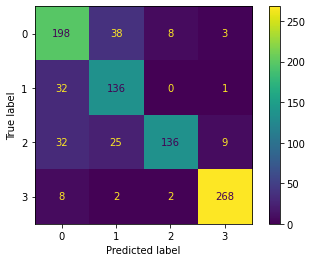

              precision    recall  f1-score   support

           0       0.73      0.80      0.77       247
           1       0.68      0.80      0.74       169
           2       0.93      0.67      0.78       202
           3       0.95      0.96      0.96       280

    accuracy                           0.82       898
   macro avg       0.82      0.81      0.81       898
weighted avg       0.84      0.82      0.82       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


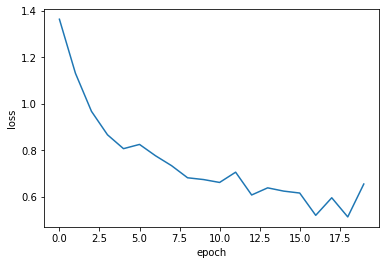

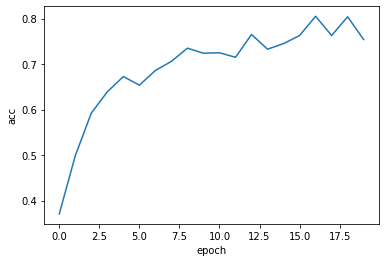

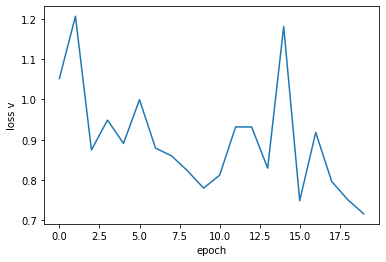

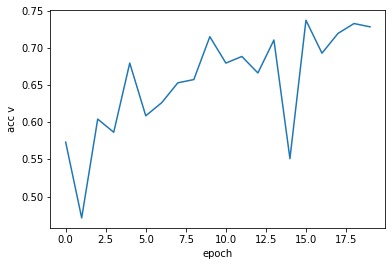

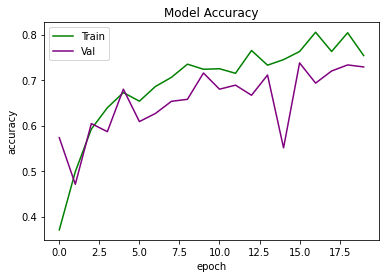

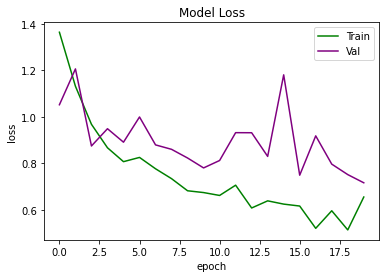

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 7 Layer Fully connected data

Epoch 1/20
29/29 [==============================] - 22s 742ms/step - loss: 1.1180 - accuracy: 0.4861 - val_loss: 0.8526 - val_accuracy: 0.6429
Epoch 2/20
29/29 [==============================] - 21s 720ms/step - loss: 0.6617 - accuracy: 0.7614 - val_loss: 0.7906 - val_accuracy: 0.6875
Epoch 3/20
29/29 [==============================] - 21s 721ms/step - loss: 0.5545 - accuracy: 0.7980 - val_loss: 0.6406 - val_accuracy: 0.7455
Epoch 4/20
29/29 [==============================] - 21s 709ms/step - loss: 0.6016 - accuracy: 0.7558 - val_loss: 0.6722 - val_accuracy: 0.7634
Epoch 5/20
29/29 [==============================] - 21s 715ms/step - loss: 0.5734 - accuracy: 0.7847 - val_loss: 0.6525 - val_accuracy: 0.7500
Epoch 6/20
29/29 [==============================] - 21s 717ms/step - loss: 0.5456 - accuracy: 0.7958 - val_loss: 0.6814 - val_accuracy: 0.7321
Epoch 7/20
29/29 [==============================] - 21s 714ms/step - loss: 0.5513 - accuracy: 0.7747 - val_loss: 0.8190 - val_accuracy: 0.6920

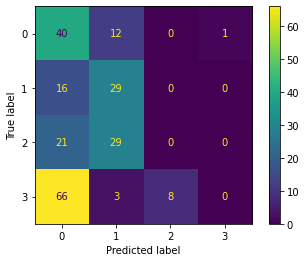

(898, 4)
(898,)
y_predict =  [1 1 1 0 0 0 0 0 1 1 0 0 0 2 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 2 1 1 1 2 0 0 0 0 0 1 0 0 1 0 1 1
 2 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 2 0 0 0 0 3 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 2 0 1 0 0 0 0 0 0 0 0 2 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 2 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 1 0 1 0 0 0 0 1 3 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 1 0 0 0 0 1 0 0 1 1 0 2 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 

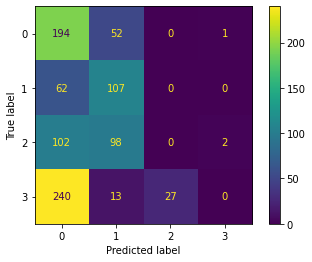

              precision    recall  f1-score   support

           0       0.32      0.79      0.46       247
           1       0.40      0.63      0.49       169
           2       0.00      0.00      0.00       202
           3       0.00      0.00      0.00       280

    accuracy                           0.34       898
   macro avg       0.18      0.35      0.24       898
weighted avg       0.16      0.34      0.22       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


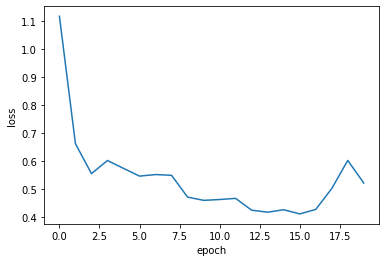

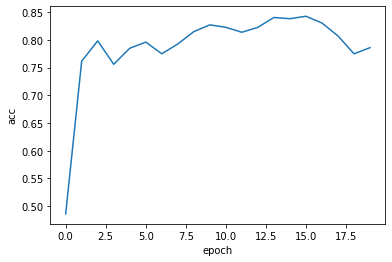

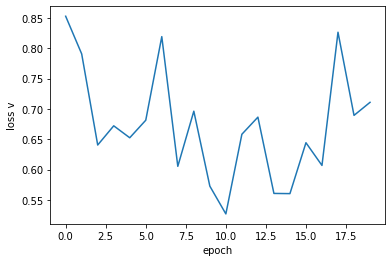

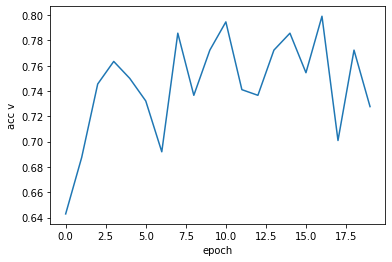

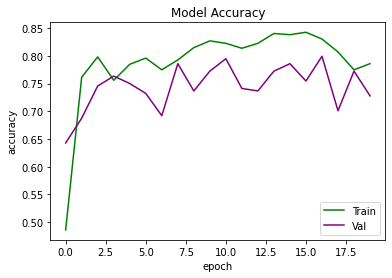

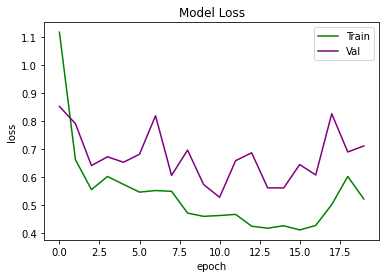

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 7 Layer Fully connected Dropout


In [ ]:
'''model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()'''

'model = Sequential()  # a basic feed-forward model\nmodel.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784\nmodel.add(Dense(128, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dense(128, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dropout(0.2))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(4, activation=\'softmax\'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution\n\n\nopt = tf.keras.optimizers.Adam(learning_rate=0.001)\n\nmodel.compile(opt ,  # Good default optimizer to start with\n              loss=\'sparse_categorical_crossentropy\',  # how will we calculate our "error." Neural network aims to minimize loss.\n              metrics=[\'accura

## 9 Layer Fully connected

Epoch 1/20
90/90 [==============================] - 3s 31ms/step - loss: 1.4163 - accuracy: 0.2951 - val_loss: 1.3810 - val_accuracy: 0.3422
Epoch 2/20
90/90 [==============================] - 2s 27ms/step - loss: 1.3804 - accuracy: 0.3118 - val_loss: 1.3773 - val_accuracy: 0.3422
Epoch 3/20
90/90 [==============================] - 2s 27ms/step - loss: 1.3773 - accuracy: 0.3118 - val_loss: 1.3749 - val_accuracy: 0.3422
Epoch 4/20
90/90 [==============================] - 2s 27ms/step - loss: 1.3750 - accuracy: 0.3118 - val_loss: 1.3732 - val_accuracy: 0.3422
Epoch 5/20
90/90 [==============================] - 2s 28ms/step - loss: 1.3734 - accuracy: 0.3118 - val_loss: 1.3717 - val_accuracy: 0.3422
Epoch 6/20
90/90 [==============================] - 2s 27ms/step - loss: 1.3720 - accuracy: 0.3118 - val_loss: 1.3706 - val_accuracy: 0.3422
Epoch 7/20
90/90 [==============================] - 2s 27ms/step - loss: 1.3710 - accuracy: 0.3118 - val_loss: 1.3699 - val_accuracy: 0.3422
Epoch 8/20
90

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


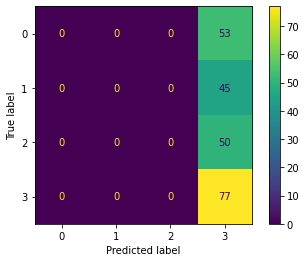

(898, 4)
(898,)
y_predict =  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

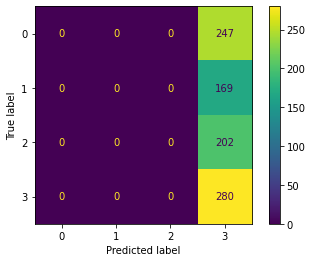

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.00      0.00      0.00       169
           2       0.00      0.00      0.00       202
           3       0.31      1.00      0.48       280

    accuracy                           0.31       898
   macro avg       0.08      0.25      0.12       898
weighted avg       0.10      0.31      0.15       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


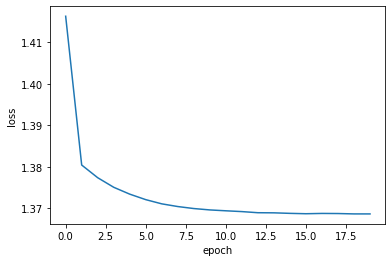

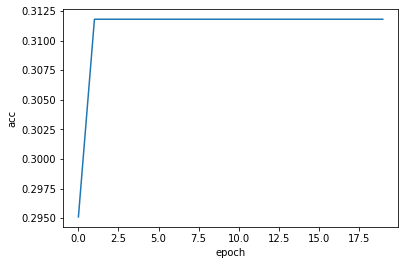

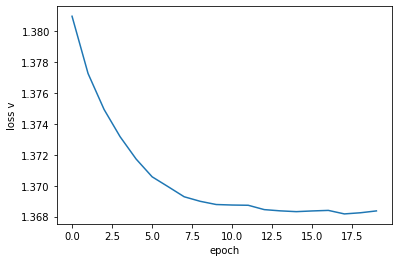

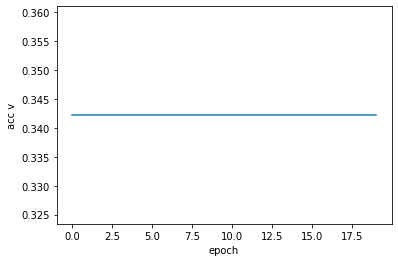

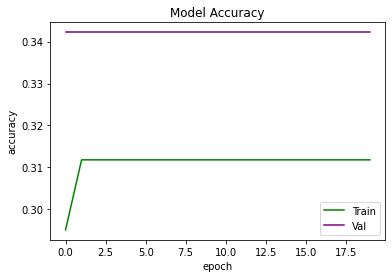

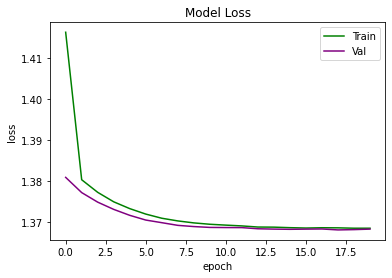

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(512, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 9 Layer Fully connected data

Epoch 1/20
29/29 [==============================] - 22s 763ms/step - loss: 4.8368 - accuracy: 0.3174 - val_loss: 1.5862 - val_accuracy: 0.4107
Epoch 2/20
29/29 [==============================] - 21s 716ms/step - loss: 1.1716 - accuracy: 0.5272 - val_loss: 1.2606 - val_accuracy: 0.5179
Epoch 3/20
29/29 [==============================] - 21s 724ms/step - loss: 1.2575 - accuracy: 0.5394 - val_loss: 1.4307 - val_accuracy: 0.5223
Epoch 4/20
29/29 [==============================] - 21s 716ms/step - loss: 0.8703 - accuracy: 0.6415 - val_loss: 1.2180 - val_accuracy: 0.5580
Epoch 5/20
29/29 [==============================] - 20s 712ms/step - loss: 1.0406 - accuracy: 0.6060 - val_loss: 1.0708 - val_accuracy: 0.6339
Epoch 6/20
29/29 [==============================] - 20s 707ms/step - loss: 0.7928 - accuracy: 0.6881 - val_loss: 1.2094 - val_accuracy: 0.6696
Epoch 7/20
29/29 [==============================] - 20s 709ms/step - loss: 0.8337 - accuracy: 0.6704 - val_loss: 0.9736 - val_accuracy: 0.6473

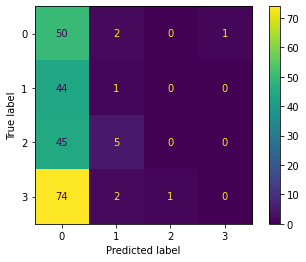

(898, 4)
(898,)
y_predict =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 1 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

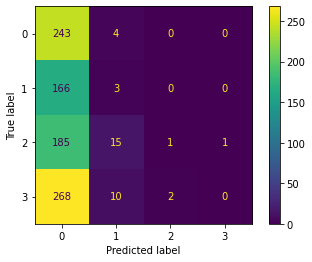

              precision    recall  f1-score   support

           0       0.28      0.98      0.44       247
           1       0.09      0.02      0.03       169
           2       0.33      0.00      0.01       202
           3       0.00      0.00      0.00       280

    accuracy                           0.28       898
   macro avg       0.18      0.25      0.12       898
weighted avg       0.17      0.28      0.13       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


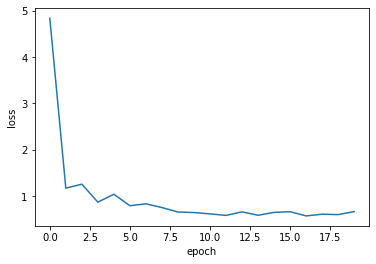

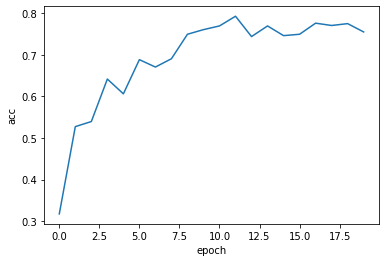

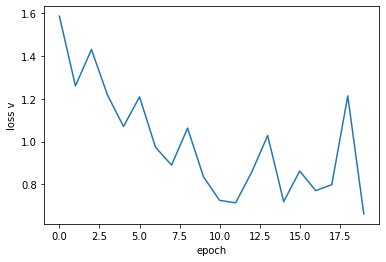

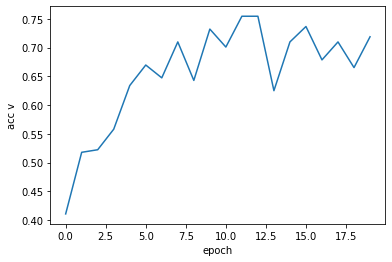

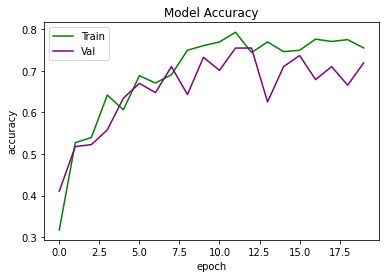

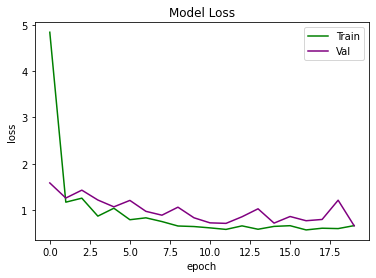

In [ ]:
model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(512, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## 9 Layer Fully connected Dropout


In [ ]:
'''model = Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(512, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt ,  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()'''

'model = Sequential()  # a basic feed-forward model\nmodel.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784\nmodel.add(Dense(512, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation=\'relu\'))  # a simple fully-connected layer, 128 units, relu activation\nmodel.add(Dropout(0.1))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(64, activation=\'relu\'))\n#model.add(Dropout(0.1))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(16, activation=\'relu\'))\nmodel.add(Dense(16, activation=\'relu\'))\nmodel.add(Dense(4, activation=\'softmax\'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution\n\nopt = tf.keras.optimizers.Adam(learning_rate=0.001)\n\nmodel.compile(opt ,  # Good default optimizer to start with\n              loss=\'sparse_categorical_crossentropy\'

# CNN

## Convolution Layer model 1*

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 248, 248, 32)      896       
                                                                 
 activation_91 (Activation)  (None, 248, 248, 32)      0         
                                                                 
 conv2d_103 (Conv2D)         (None, 246, 246, 32)      9248      
                                                                 
 activation_92 (Activation)  (None, 246, 246, 32)      0         
                                                                 
 flatten_18 (Flatten)        (None, 1936512)           0         
                                                                 
 dense_38 (Dense)            (None, 64)                123936832 
                                                                 
 dense_39 (Dense)            (None, 4)               

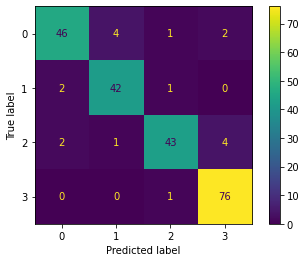

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

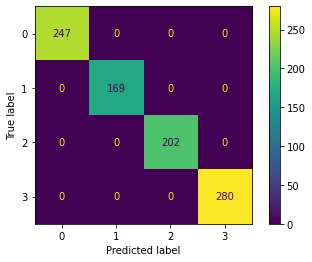

precision :  0.9188072245662328
recall :  0.9120677121620517
f1_score : 0.9145138844641612

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


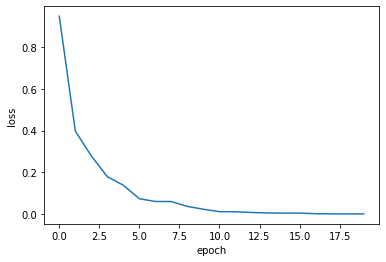

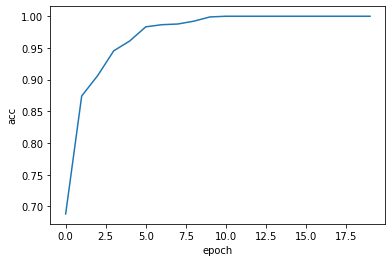

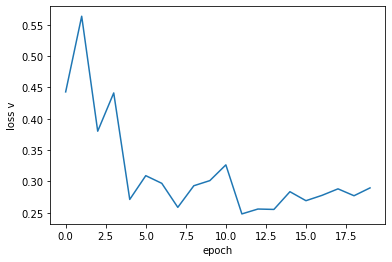

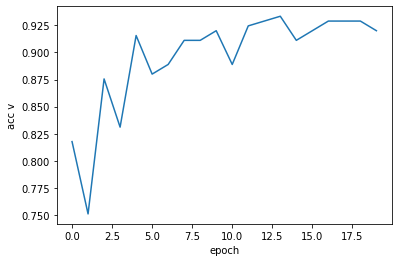

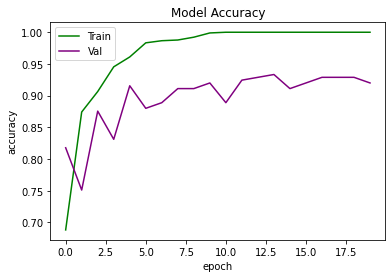

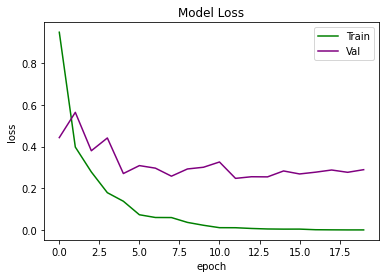

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1),padding="valid",dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 248, 248, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 246, 246, 32)      9248      
                                                                 
 activation_4 (Activation)   (None, 246, 246, 32)      0         
                                                                 
 flatten_3 (Flatten)         (None, 1936512)           0         
                                                                 
 dense_8 (Dense)             (None, 64)                123936832 
                                                                 
 dense_9 (Dense)             (None, 4)                

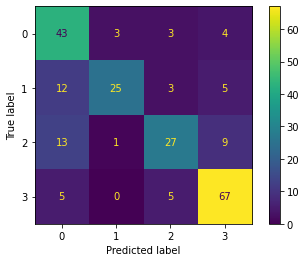

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 0 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 0 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 3 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 0 1 3 2 3 2 0 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 0 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 0 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

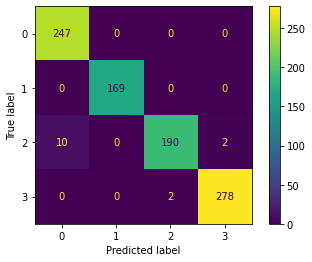

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       247
           1       1.00      1.00      1.00       169
           2       0.99      0.94      0.96       202
           3       0.99      0.99      0.99       280

    accuracy                           0.98       898
   macro avg       0.99      0.98      0.98       898
weighted avg       0.98      0.98      0.98       898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


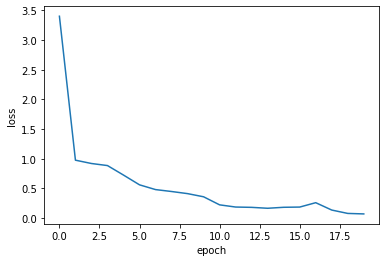

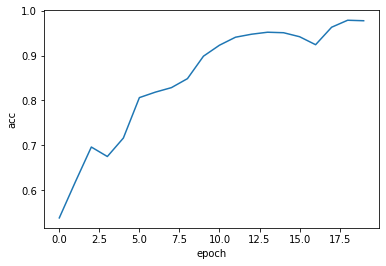

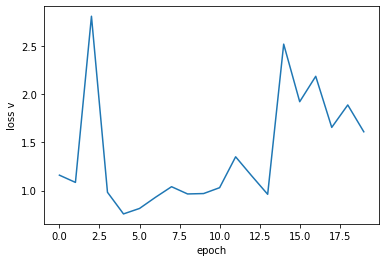

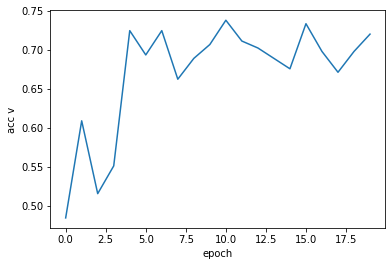

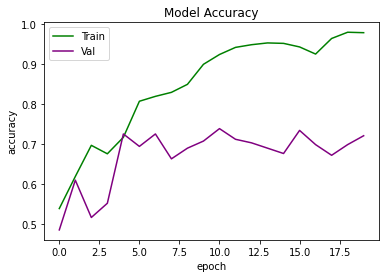

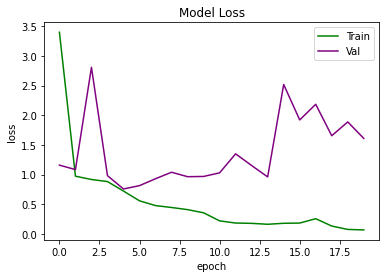

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1),padding="valid",dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()
print(classification_report(y_train,y_pred))


'''
#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))
'''

print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 246, 246, 32)      2432      
                                                                 
 activation_6 (Activation)   (None, 246, 246, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 242, 242, 32)      25632     
                                                                 
 activation_7 (Activation)   (None, 242, 242, 32)      0         
                                                                 
 flatten_4 (Flatten)         (None, 1874048)           0         
                                                                 
 dense_10 (Dense)            (None, 64)                119939136 
                                                                 
 dense_11 (Dense)            (None, 4)                

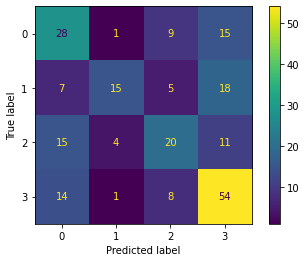

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 0 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 0 3 1 3 0 0 1 0 0 0 1 0 0 0 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 0 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 0 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

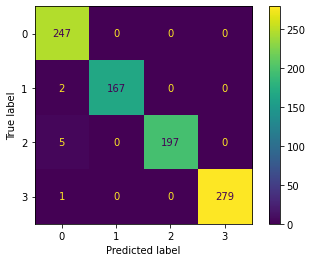

precision :  0.544749149659864
recall :  0.49073348035612185
f1_score : 0.49627584975411054

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


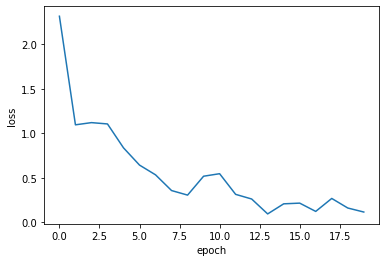

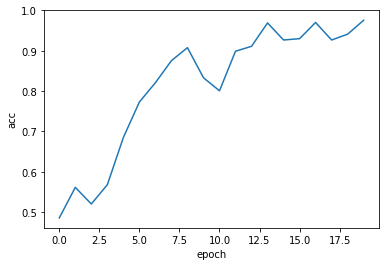

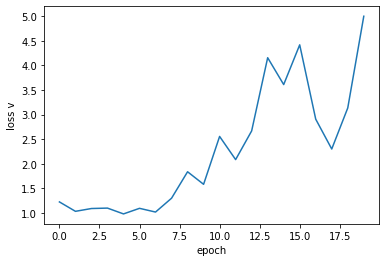

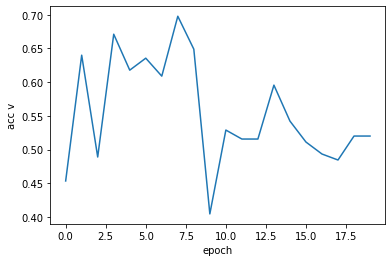

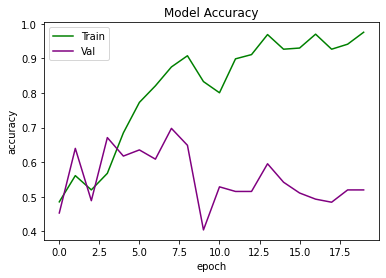

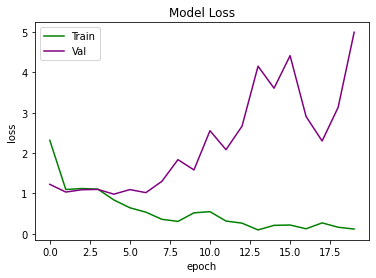

In [ ]:

model = Sequential()

model.add(Conv2D(32, (5, 5),strides=(1, 1),padding="valid",dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5),strides=(1, 1),padding="valid",dilation_rate=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 3

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(1, 1), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 4

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      2432      
                                                                 
 activation_12 (Activation)  (None, 125, 125, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 32)        25632     
                                                                 
 activation_13 (Activation)  (None, 63, 63, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 127008)            0         
                                                                 
 dense_14 (Dense)            (None, 64)                8128576   
                                                                 
 dense_15 (Dense)            (None, 4)                

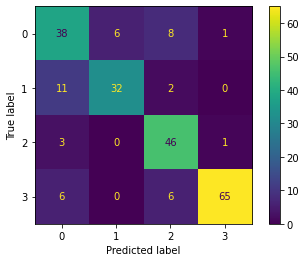

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 1 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 0 0 3 0 0 3 0 3 3
 3 2 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 2 2
 3 0 2 2 3 0 2 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 2 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 2 0
 2 0 1 2 0 2 3 1 0 3 0 1 2 3 3 1 3 0 2 3 2 2 0 3 2 0 1 0 2 0 0 3 0 1 0 3 1
 3 2 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 1 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 0 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 2 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 2 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 2 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 2 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

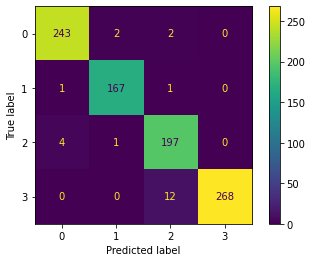

precision :  0.8023406036383273
recall :  0.7980620218356067
f1_score : 0.7949938428101078

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


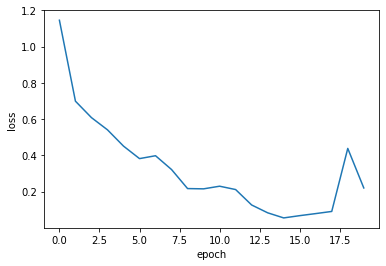

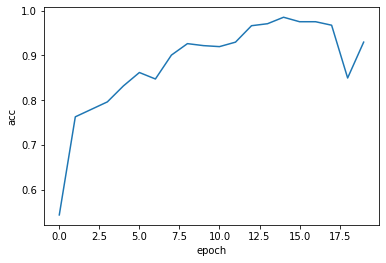

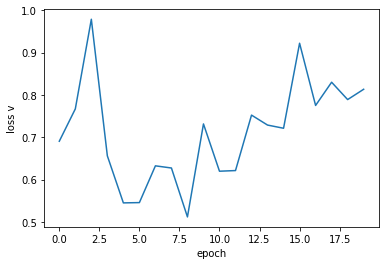

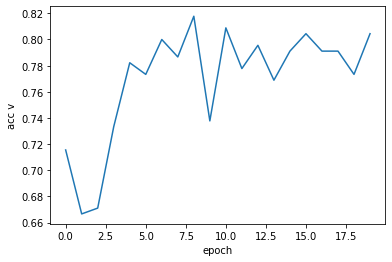

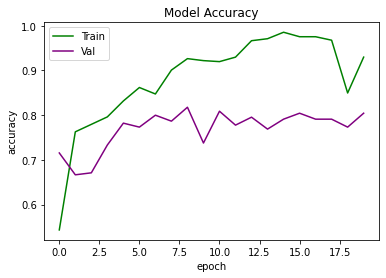

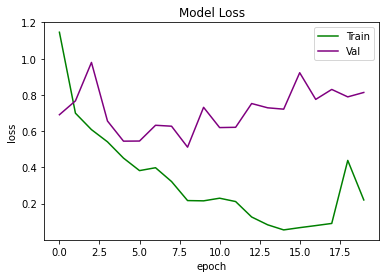

In [ ]:

model = Sequential()

model.add(Conv2D(32, (5, 5),strides=(2,2),padding="same",dilation_rate=(1,1), input_shape=x_train.shape[1:]))
model.add(Activation('relu' ))

model.add(Conv2D(32, (5, 5),strides=(2,2),padding="same",dilation_rate=(1,1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 5

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5),strides=(1,1),padding="valid",dilation_rate=(2,2), input_shape=x_train.shape[1:]))
model.add(Activation('relu' ))

model.add(Conv2D(32, (5,5),strides=(1,1),padding="valid",dilation_rate=(2,2)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 6

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 6 data augmentation

Epoch 1/20
29/29 [==============================] - 24s 832ms/step - loss: 2.8699 - accuracy: 0.5583 - val_loss: 0.8226 - val_accuracy: 0.7188
Epoch 2/20
29/29 [==============================] - 22s 761ms/step - loss: 0.7194 - accuracy: 0.7170 - val_loss: 0.8901 - val_accuracy: 0.6875
Epoch 3/20
29/29 [==============================] - 22s 768ms/step - loss: 0.6555 - accuracy: 0.7492 - val_loss: 0.8322 - val_accuracy: 0.7009
Epoch 4/20
29/29 [==============================] - 22s 767ms/step - loss: 0.6710 - accuracy: 0.7481 - val_loss: 1.0975 - val_accuracy: 0.6518
Epoch 5/20
29/29 [==============================] - 22s 767ms/step - loss: 0.6922 - accuracy: 0.7514 - val_loss: 0.8508 - val_accuracy: 0.6696
Epoch 6/20
29/29 [==============================] - 22s 758ms/step - loss: 0.6500 - accuracy: 0.7425 - val_loss: 1.0056 - val_accuracy: 0.6250
Epoch 7/20
29/29 [==============================] - 22s 750ms/step - loss: 0.7175 - accuracy: 0.6970 - val_loss: 0.8509 - val_accuracy: 0.6295

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


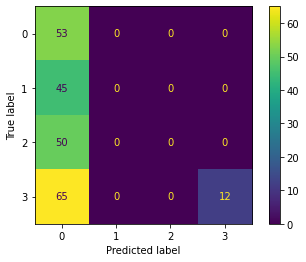

(898, 4)
(898,)
y_predict =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 3 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 

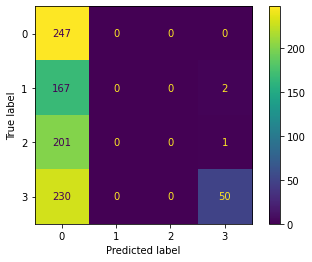

precision :  0.31220657276995306
recall :  0.288961038961039
f1_score : 0.1670397904874546

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


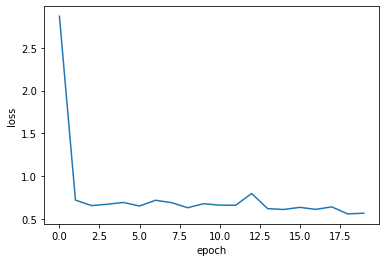

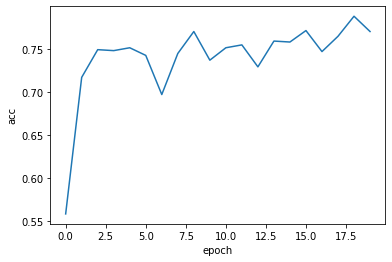

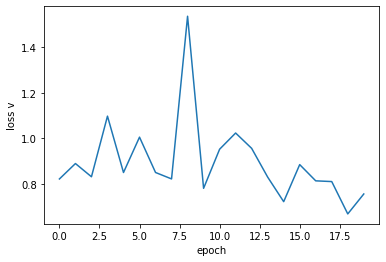

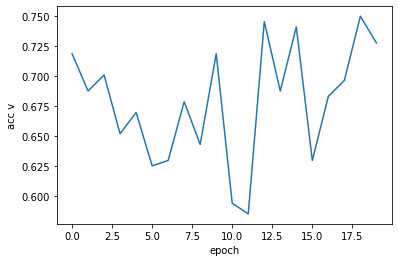

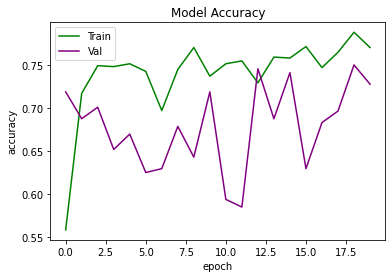

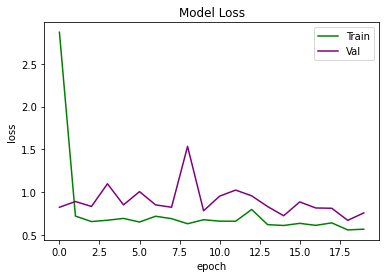

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,shuffle=True,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## convolution layer model 7

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## convolution layer model 8

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(1, 1), padding="same", dilation_rate=(2, 2), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (4, 4),strides=(1, 1),padding="same",dilation_rate=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# pooling

## Convolution Layer maxpooling model 1*

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 248, 248, 32)      896       
                                                                 
 activation_94 (Activation)  (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 122, 122, 32)      9248      
                                                                 
 activation_95 (Activation)  (None, 122, 122, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                

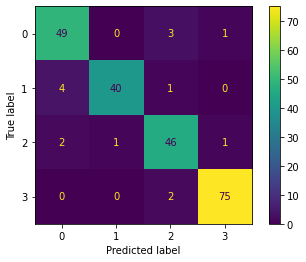

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 0 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 0 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

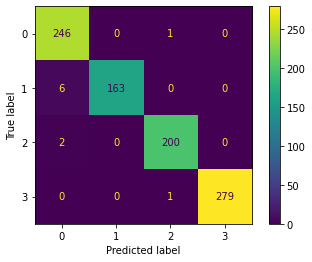

precision :  0.9312900514120026
recall :  0.9268607912004139
f1_score : 0.9284066809716605

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


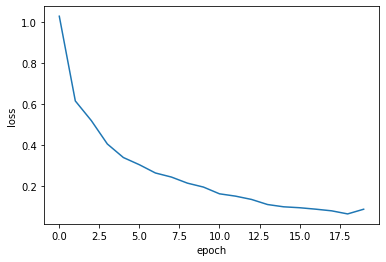

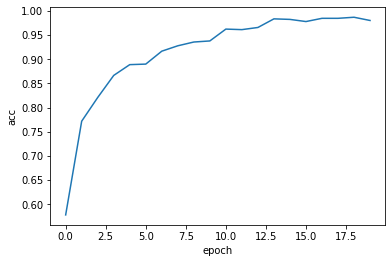

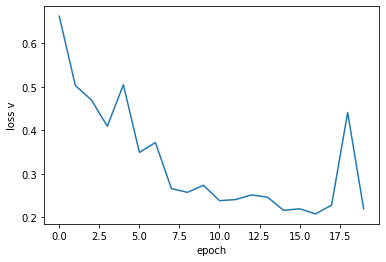

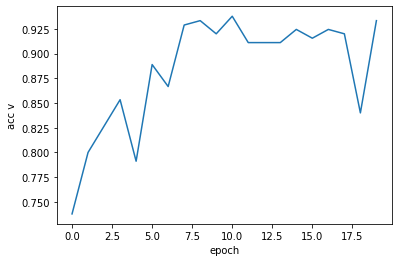

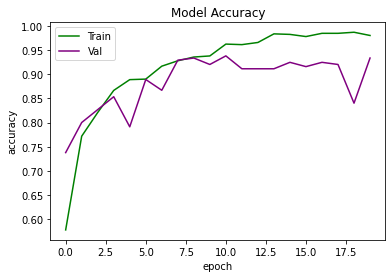

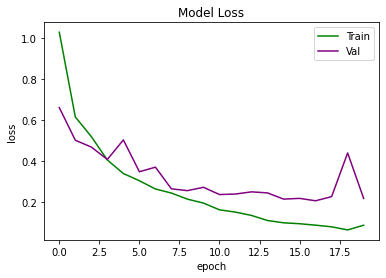

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid",dilation_rate=(1, 1),
input_shape=x_train.shape[1:]))

model.add(Activation('relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid", dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer avgpooling model 1


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 activation_85 (Activation)  (None, 248, 248, 32)      0         
                                                                 
 average_pooling2d_1 (Averag  (None, 124, 124, 32)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_99 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 activation_86 (Activation)  (None, 122, 122, 32)      0         
                                                                 
 average_pooling2d_2 (Averag  (None, 61, 61, 32)       0         
 ePooling2D)                                         

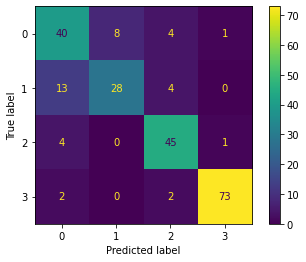

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 0 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

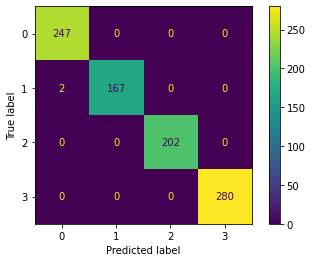

precision :  0.8118147577469612
recall :  0.8062477878515615
f1_score : 0.8058282279773508

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


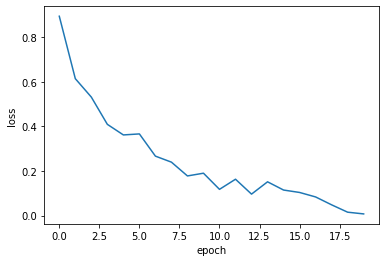

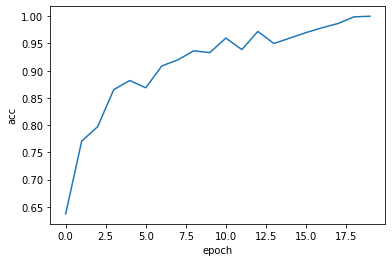

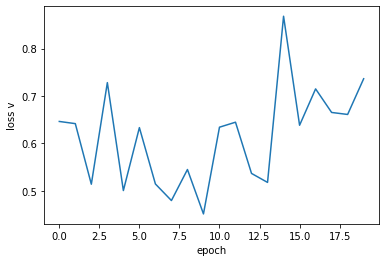

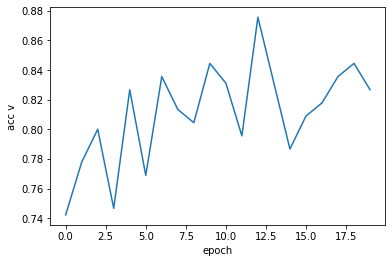

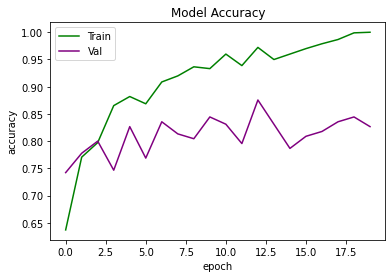

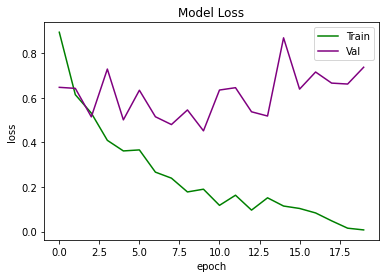

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid",dilation_rate=(1, 1),
input_shape=x_train.shape[1:]))

model.add(Activation('relu' ))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid", dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 6 max pooling



In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## Convolution Layer model 6 avrg pooling



In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## model 7 max pooling

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## model 7 max pooling data augmentation

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)


model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,shuffle=True,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## model 7 avrg pooling

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# drop , batch

## Convolution Layer maxpooling model 1 dropout

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid",dilation_rate=(1, 1),
input_shape=x_train.shape[1:]))

model.add(Activation('relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid", dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model 7 maxpool drop

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 125, 125, 32)      1568      
                                                                 
 activation_97 (Activation)  (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 31, 31, 32)        16416     
                                                                 
 activation_98 (Activation)  (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                

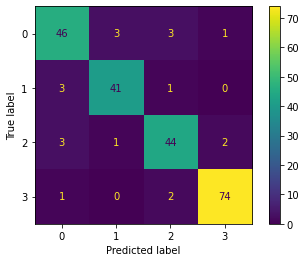

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 0 2 2 0 2 3 2 3 1 0 3 3 2 2 2 0 1 0 1 3 1 1 0 1 3 0 0 3 0 3 3
 3 3 2 3 1 3 3 3 3 1 0 1 2 0 1 0 2 1 0 2 3 0 0 1 3 1 3 1 3 3 0 0 2 0 3 2 2
 3 0 2 2 3 0 3 3 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 0 2
 2 0 3 3 2 0 2 3 0 3 1 1 3 0 2 0 3 0 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 3 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 2 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 2 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 2 0 1 3 3 3 1 0 1 1 1 3 1 2 2 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 2 2 0 3 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 0 0 2 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 3 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 2 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 1 3 2 1 2 1 0 0 1 0 1 0 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 2 2 3 0 0 3 2 3 3 3 3 0 2 1 3 1 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 3 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 1 3 0 2 1 3 0 1 3 2 0 1 2 0 1 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

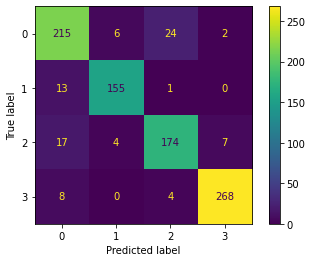

precision :  0.9050186501129898
recall :  0.9050186501129898
f1_score : 0.9050186501129898

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


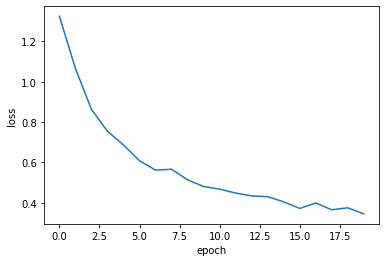

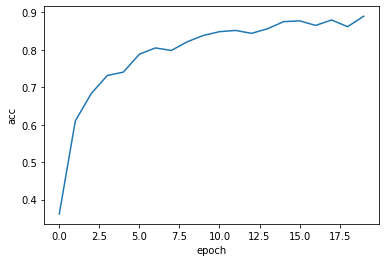

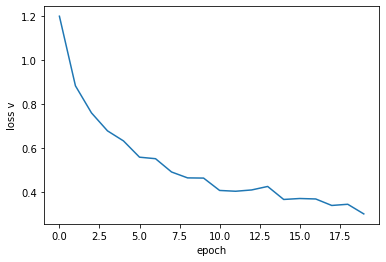

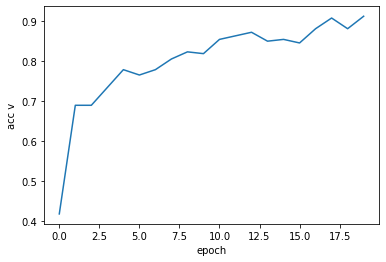

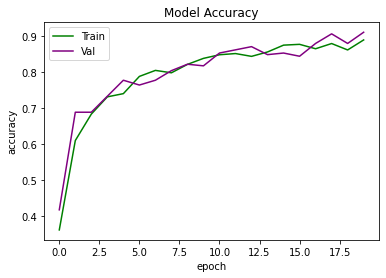

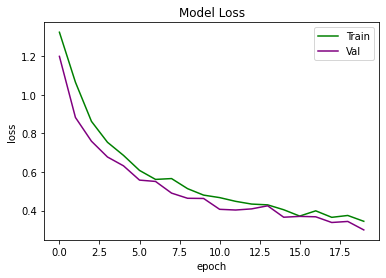

In [ ]:
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model6 maxpool drop

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      896       
                                                                 
 activation_13 (Activation)  (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 32)        9248      
                                                                 
 activation_14 (Activation)  (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

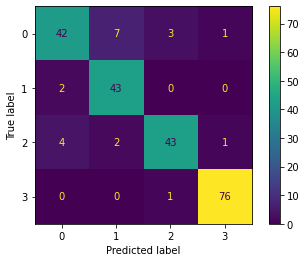

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 1 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 1 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

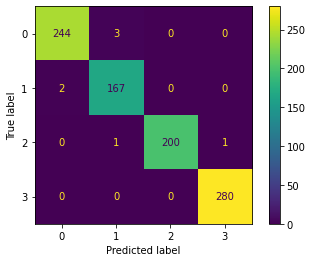

precision :  0.897793917075832
recall :  0.8987553431893054
f1_score : 0.8963810514739534

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


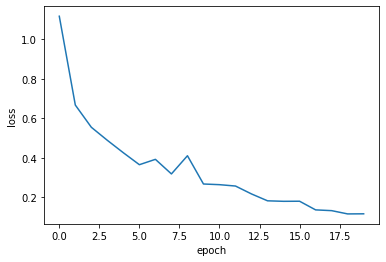

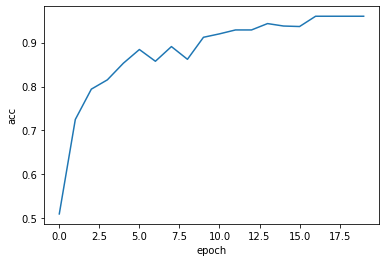

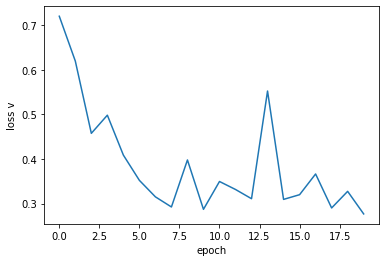

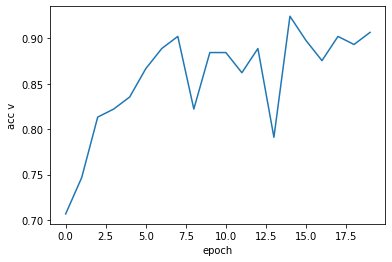

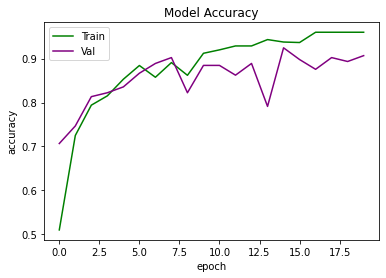

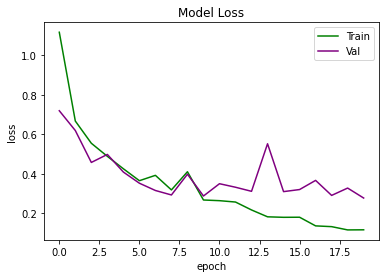

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model 1 maxpool batch

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 248, 248, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_22 (Activation)  (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 batch_normalization_2 (Batc  (None, 122, 122, 32)    

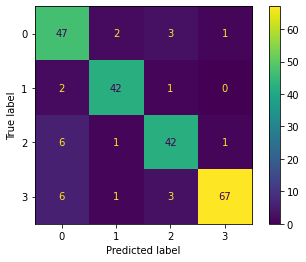

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 0 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 0 1 2 1 3 1 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 0 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 0 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

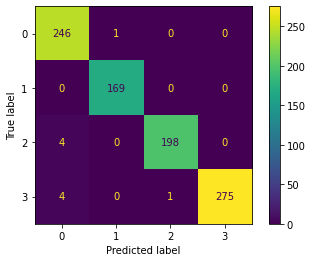

precision :  0.8779231578590095
recall :  0.8825639140733481
f1_score : 0.8784828485621565

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


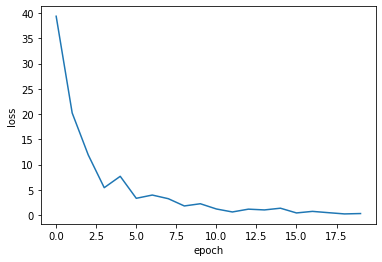

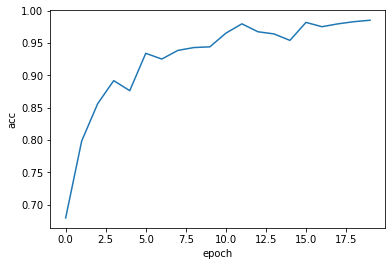

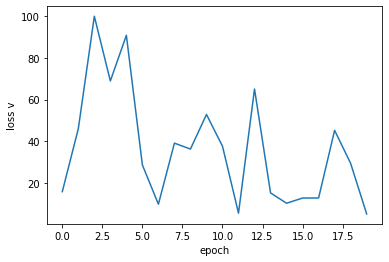

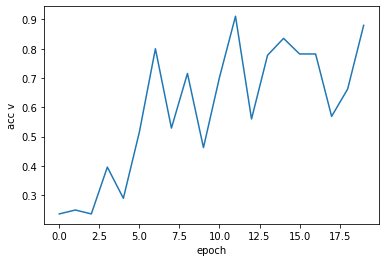

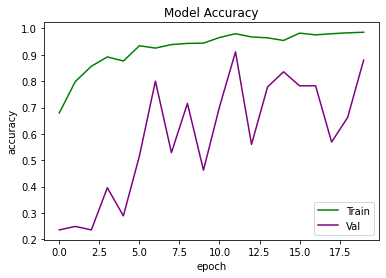

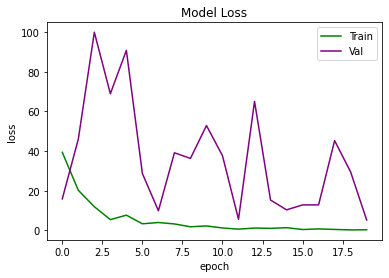

In [ ]:
#model 1 maxpool batch
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid",dilation_rate=(1, 1),
input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid", dilation_rate=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model 6 maxpool drop data augmentation

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)


model.compile(opt,  # Good default optimizer to start with
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,shuffle=True,
          batch_size=10 # valid_files/batch_size
          )
#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_train,y_predict,average='macro'))
print("recall : ",recall_score(y_train,y_predict,average='macro'))
print("f1_score :",f1_score(y_train,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model 6 maxppol batch

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 125, 125, 32)      896       
                                                                 
 batch_normalization_53 (Bat  (None, 125, 125, 32)     128       
 chNormalization)                                                
                                                                 
 activation_88 (Activation)  (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 31, 31, 32)        9248      
                                                                 
 batch_normalization_54 (Bat  (None, 31, 31, 32)     

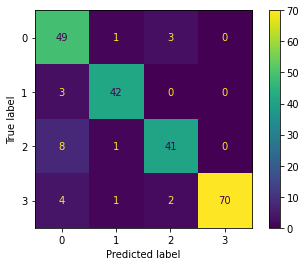

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 0 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 0 3 1 1 3 0 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

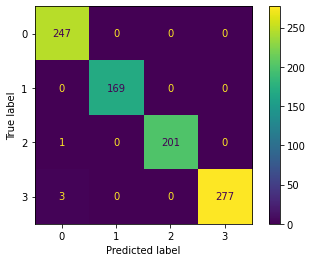

precision :  0.8975656702898551
recall :  0.8967381360777588
f1_score : 0.8943719474969474

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


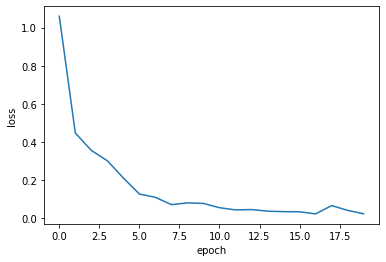

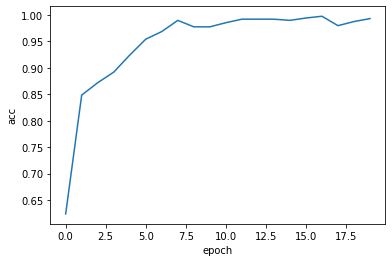

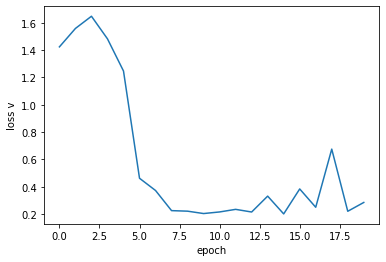

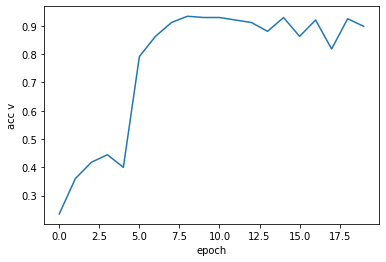

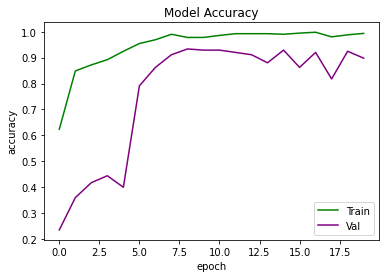

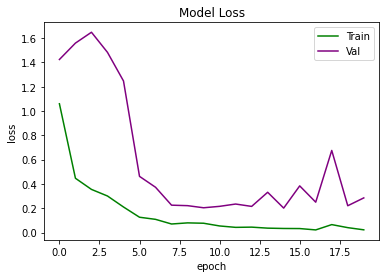

In [ ]:
#model 6 maxpool batch
model = Sequential()

model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# model 7 maxpool batch

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      1568      
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_28 (Activation)  (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 31, 31, 32)        16416     
                                                                 
 batch_normalization_6 (Batc  (None, 31, 31, 32)     

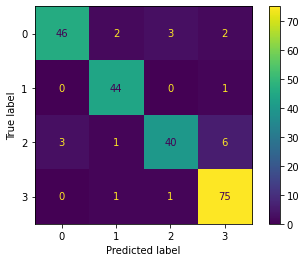

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 2 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

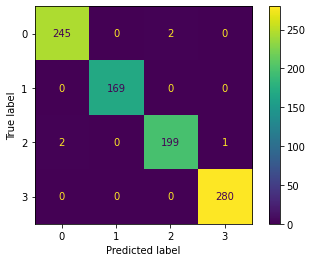

precision :  0.9143475572047001
recall :  0.9049320700264096
f1_score : 0.9077345479685712

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


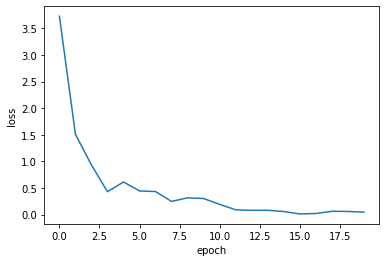

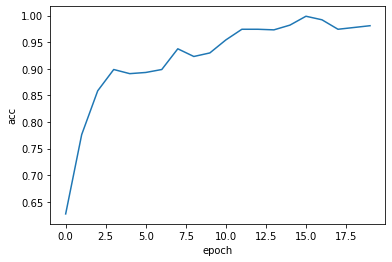

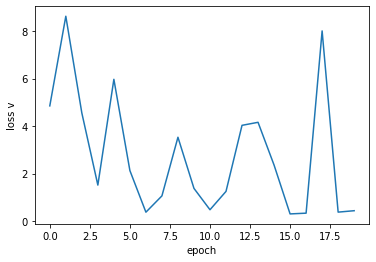

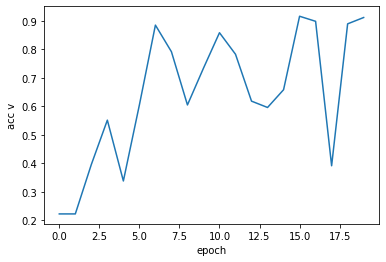

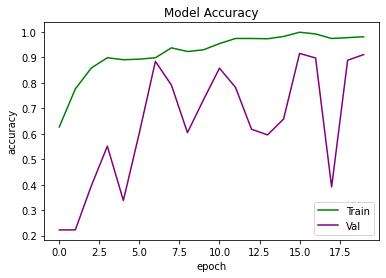

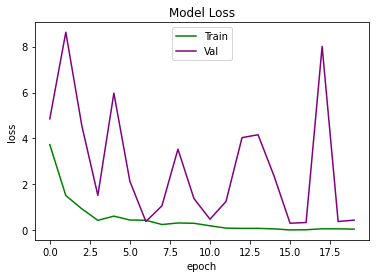

In [ ]:
#model 7 maxp batch
model = Sequential()

model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# call back

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint



callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# if we find a better model during training we would like to save a fresh copy
best_model_file_path = "D:/"

best_model = ModelCheckpoint(best_model_file_path, monitor="val_accuracy", verbose=1, save_best_only=True)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train , y_train,validation_data=(x_val,y_val), epochs=20 , verbose=1 , callbacks=[best_model])


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_161 (Conv2D)         (None, 248, 248, 32)      896       
                                                                 
 activation_179 (Activation)  (None, 248, 248, 32)     0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_162 (Conv2D)         (None, 122, 122, 32)      9248      
                                                                 
 activation_180 (Activation)  (None, 122, 122, 32)     0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                

#resnet50

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 256, 256, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 125, 125, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

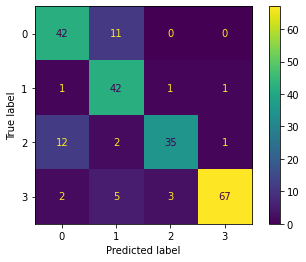

(898, 1123)
(898,)
y_predict =  [0 3 1 3 2 3 0 2 0 0 0 3 0 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 0 0 3 0 0 3 0 3 3
 1 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 1 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 1 3 1 1 1 1 1 2
 2 0 3 3 2 0 0 3 1 3 1 1 3 3 2 0 3 3 2 2 3 3 3 0 0 1 3 1 3 0 0 2 2 1 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 1 2 1 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 0 1 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 0 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 2 0 0 1 1 1 3 1 2 2 2 3 2 3 3 0 1 0 2 1 0 2
 3 0 3 1 3 3 1 1 0 3 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 0 3 2 1 2
 0 3 2 2 0 0 3 2 1 0 1 3 1 1 0 1 1 2 3 0 1 0 0 2 0 3 1 1 0 1 3 0 1 0 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 1 0 2 1 3 1 2 3 3 1 3 3 2 2 0 1 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 1 0 0 0 3 3 2 0 1 2 3 0 0 1 3 1 1 3 0 1 1 2 0 0 1 2 1 3 0 1 3 0
 0 1 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 1 3 3 0 3 3 0 1 2 2 2 3 0

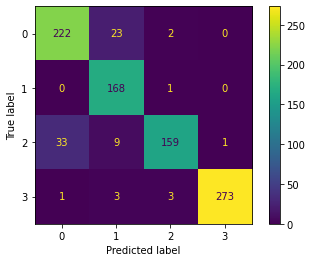

precision :  0.8263231238631695
recall :  0.8239790084129706
f1_score : 0.8169903591867576

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


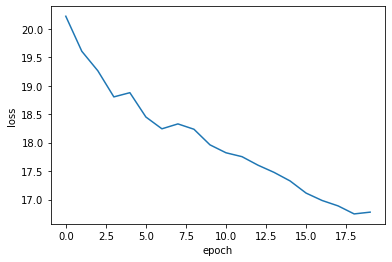

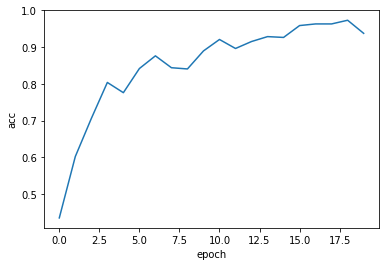

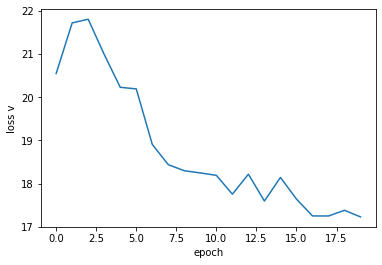

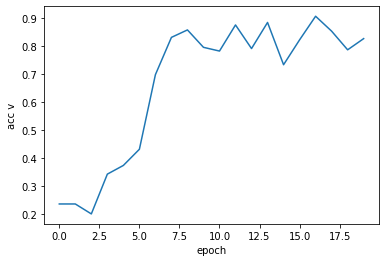

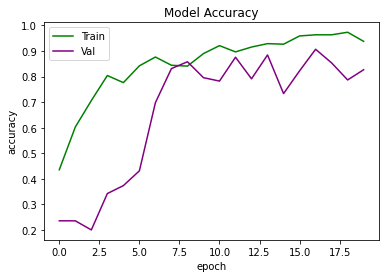

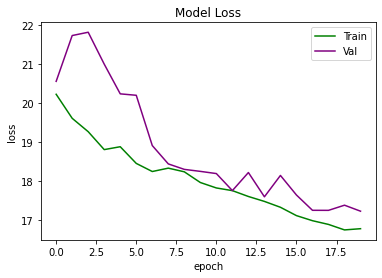

In [ ]:


from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


def res_identity(x, filters):
  ''' renet block where dimension doesnot change.
  The skip connection is just simple identity conncection
  we will have 3 blocks and then input will be added
  '''
  x_skip = x # this will be used for addition with the residual block
  f1, f2 = filters

  #first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x
def res_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  '''
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x
### Combine the above functions to build 50 layers resnet.
def resnet50():

  input_im = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])) # cifar 10 images size
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(labels), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model

  model = Model(inputs=input_im, outputs=x, name='Resnet50')

  return model
resnet50_model = resnet50()

resnet50_model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

resnet50_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history=resnet50_model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=resnet50_model.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=resnet50_model.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

## inception   


In [ ]:
'''from tensorflow.keras.layers import Input
from keras.layers import concatenate
from tensorflow.keras.models import Model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

input_layer = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))
#x_train.shape[1:]
#model.add(BatchNormalization())
, name='conv_1_3x3/2'''''', name='max_pool_1_3x3/2'''''',name='conv_2a_3x3/1'''''', name='conv_2b_3x3/1'''''',name='max_pool_2_3x3/2
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="zeros")(input_layer)
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2))(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu' )(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)
model = Model(input_layer, [x,x1,x2], name='inception_v1')

model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
#print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
#y_predict= np.argmax(y_predict,axis=1)
#print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
#print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
#print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()'''

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_623 (Conv2D)            (None, 125, 125, 64  9472        ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_126 (MaxPooling2  (None, 63, 63, 64)  0           ['conv2d_623[0][0]']             
 D)                                                                                    

ValueError: ignored

Epoch 1/20
90/90 [==============================] - 9s 68ms/step - loss: 1.3081 - accuracy: 0.3452 - val_loss: 1.1921 - val_accuracy: 0.4933
Epoch 2/20
90/90 [==============================] - 4s 46ms/step - loss: 1.0952 - accuracy: 0.5045 - val_loss: 1.0007 - val_accuracy: 0.4889
Epoch 3/20
90/90 [==============================] - 4s 48ms/step - loss: 0.9990 - accuracy: 0.5390 - val_loss: 0.8136 - val_accuracy: 0.5689
Epoch 4/20
90/90 [==============================] - 4s 47ms/step - loss: 0.9397 - accuracy: 0.5579 - val_loss: 0.8042 - val_accuracy: 0.6133
Epoch 5/20
90/90 [==============================] - 4s 47ms/step - loss: 0.8766 - accuracy: 0.6091 - val_loss: 0.7733 - val_accuracy: 0.6444
Epoch 6/20
90/90 [==============================] - 4s 47ms/step - loss: 0.7912 - accuracy: 0.6303 - val_loss: 0.7617 - val_accuracy: 0.6133
Epoch 7/20
90/90 [==============================] - 4s 46ms/step - loss: 0.7617 - accuracy: 0.6503 - val_loss: 0.5425 - val_accuracy: 0.7600
Epoch 8/20
90

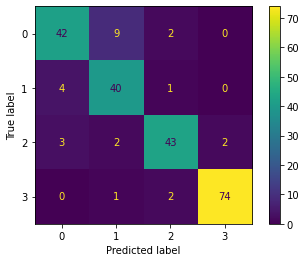

y_predict =  [0 3 1 3 2 3 1 2 0 0 2 3 2 3 1 3 3 0 2 2 2 0 1 2 1 2 1 1 0 0 3 0 0 3 0 3 3
 3 3 2 3 1 3 3 0 3 1 0 1 2 0 1 0 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 1 3 0 1
 3 0 2 2 3 0 3 1 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 1 1 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 2 2 0 1 3 2 0 0 2 0 3 3 0 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 2 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 2 1 0 2 0 2 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 1 2 3 3 3 3 0 1 0 2 1 0 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 1 3 0 2 3 3 1 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 0 0 2 0 2 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 0 2 3 3 3
 0 3 2 2 3 0 0 3 2 3 3 3 1 0 2 1 3 1 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 1 3 0 2 1 3 0 1 3 2 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 1 0 2 3 1 0 3 3 0 3 3 0 1 2 0 2 3 0 1 3 2
 0 2 2 0 3 2

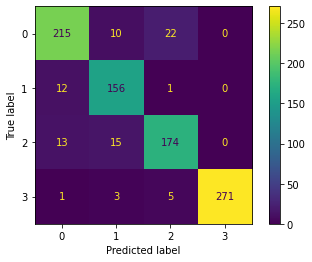

precision :  0.873972792558319
recall :  0.8755951700291323
f1_score : 0.8732857404130037

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


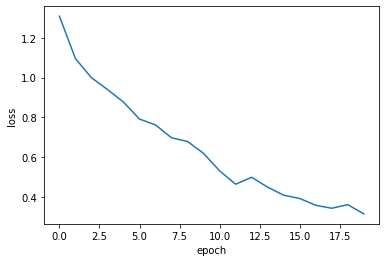

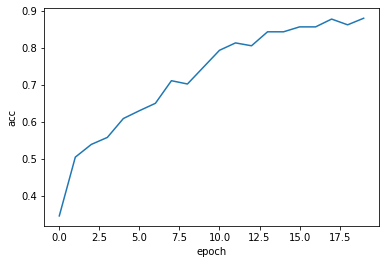

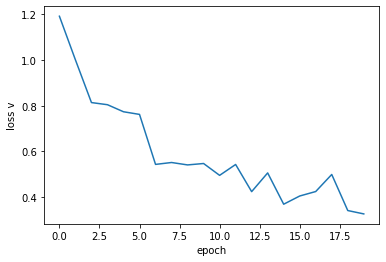

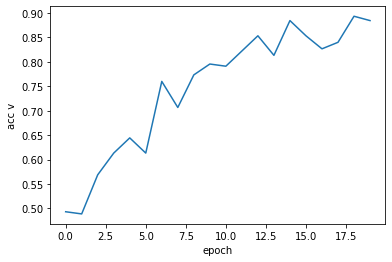

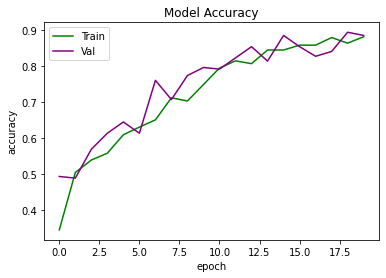

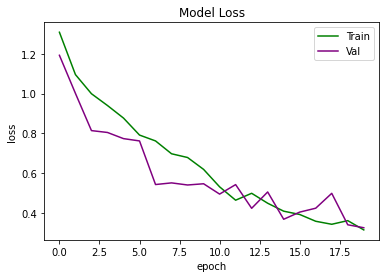

In [ ]:
from tensorflow.keras.layers import Input
from keras.layers import concatenate
from tensorflow.keras.models import Model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

input_layer = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))
#x_train.shape[1:]
#model.add(BatchNormalization())
''', name='conv_1_3x3/2'''''', name='max_pool_1_3x3/2'''''',name='conv_2a_3x3/1'''''', name='conv_2b_3x3/1'''''',name='max_pool_2_3x3/2'''
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="zeros")(input_layer)
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2))(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu' )(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')
'''

x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')
'''
x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(4, activation='softmax', name='output')(x)
model = Model(input_layer, x, name='inception_v1')

#model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model.predict(x_val)
#print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
#print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(x_train)
#print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
#print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# Transfer Learning Inception

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 2048)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 4)                 73732     
                                                                 
Total params: 21,876,516
Trainable params: 73,732
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/20
90/90 [==============================] - 31s 223ms/step - loss: 1.5226 - accuracy: 0.6904 - 

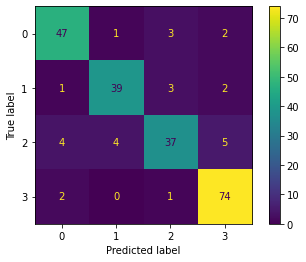

(898, 4)
(898,)
y_predict =  [0 3 1 3 2 3 2 2 0 0 2 3 2 3 1 3 3 3 2 2 2 0 1 0 1 3 1 1 2 0 3 0 0 3 0 3 3
 3 3 0 3 1 3 3 0 3 1 0 1 2 1 1 1 2 1 0 2 3 1 0 1 3 1 3 1 3 3 0 0 2 0 3 0 2
 3 0 2 2 3 0 3 2 2 3 2 1 0 0 0 2 3 1 3 1 2 1 0 0 1 2 0 0 0 0 3 1 1 1 0 1 2
 2 0 3 3 2 0 2 3 3 3 1 1 3 3 0 0 3 3 2 2 3 3 3 2 0 2 3 1 3 2 0 2 2 0 0 3 0
 3 1 0 0 1 1 0 2 0 1 3 2 0 0 2 0 3 3 1 3 0 0 0 3 3 3 0 1 2 3 3 1 2 0 0 3 0
 2 0 1 2 0 2 3 1 0 3 0 1 3 3 3 1 3 0 2 3 2 2 0 3 2 0 0 0 2 0 0 3 0 1 0 3 1
 3 3 3 3 3 3 0 1 3 0 0 0 1 3 3 3 0 0 1 1 1 3 1 2 0 2 3 3 3 3 0 1 0 2 1 2 2
 3 0 3 1 3 3 1 1 0 2 0 2 2 2 2 3 3 1 2 0 3 0 1 0 0 1 0 3 0 3 3 2 0 3 0 3 1
 1 1 0 3 0 0 3 3 0 0 3 2 2 3 3 2 1 3 1 3 0 0 1 0 0 0 1 0 0 2 1 3 2 3 2 2 2
 0 3 2 2 0 0 3 2 1 2 1 3 0 1 0 1 1 2 3 0 1 0 0 2 0 3 1 0 0 1 3 0 1 2 3 3 3
 0 3 3 2 3 0 0 3 2 3 3 3 2 0 2 1 3 2 2 3 3 1 3 3 2 2 2 0 0 0 2 2 2 2 3 3 0
 2 3 3 0 2 0 0 0 2 3 3 2 0 0 2 3 0 0 1 3 0 1 3 0 0 1 2 0 0 1 2 1 3 0 1 3 0
 0 0 3 1 0 2 3 3 2 1 0 1 3 0 3 1 0 0 2 3 1 0 3 3 0 3 3 0 1 2 2 2 3 0 1 

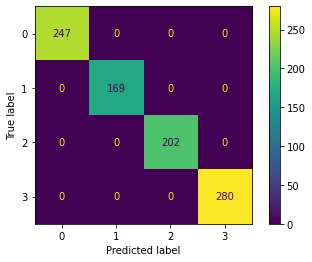

precision :  0.8723023406758347
recall :  0.8636245201339542
f1_score : 0.8667858024581026

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


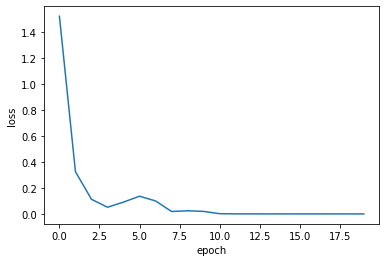

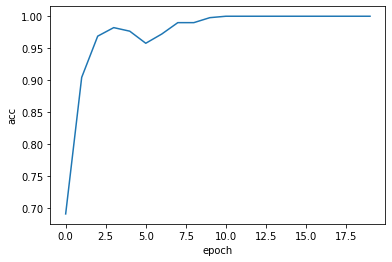

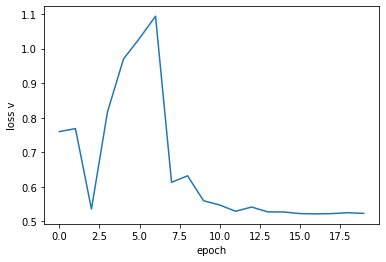

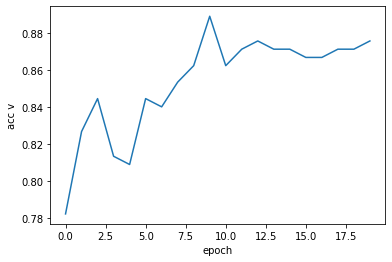

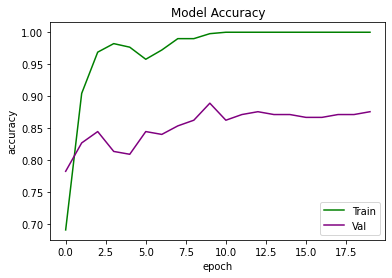

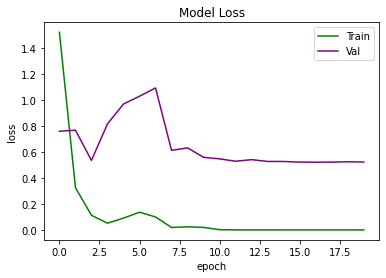

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(250,250,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )


base_model.trainable = False

model_inc = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="softmax")])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_inc.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_inc.summary()
history=model_inc.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

#predict on valid set
y_predict=model_inc.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model_inc.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()
# Training




# Transfer Learning Inception data augmentation

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 3, 3, 2048)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 18432)             0         
                                                                 
 dense_12 (Dense)            (None, 4)                 73732     
                                                                 
Total params: 21,876,516
Trainable params: 73,732
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/20
29/29 [==============================] - 95s 1s/step - loss: 1.4354 - accuracy: 0.7370 - va

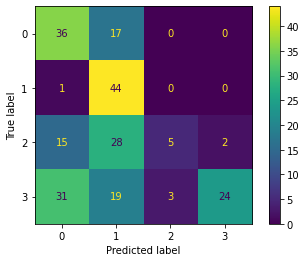

(898, 4)
(898,)
y_predict =  [0 1 1 1 1 3 0 2 0 0 1 3 1 0 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2 0 0 0 1 1 1 2 2
 3 0 0 0 1 1 3 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 3 1 3 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 3 0 1 1 0 0 0 1 0 0 0 1 0 1 3 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 2 0 0 0 0 2 1 1 3 3 0 0 1 3 2 0 3 1 3 0 0 3 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 0 3 3 3 0 1 0 3 3 1 0 0 1 1 0
 2 0 1 0 0 3 3 1 0 0 0 1 3 3 0 1 3 1 0 3 0 0 1 3 1 0 0 0 0 1 0 3 0 1 0 3 1
 1 3 3 2 0 3 0 1 3 0 1 0 1 1 3 2 0 0 1 1 1 2 1 3 0 1 0 0 0 1 0 1 1 0 1 0 3
 3 0 1 1 0 0 1 1 0 0 0 0 1 0 2 3 3 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 2 0 0 1
 1 1 1 1 0 0 0 3 0 0 2 0 0 0 3 0 1 1 1 3 0 0 1 0 0 0 1 1 0 1 1 0 3 2 1 1 1
 0 0 2 0 0 0 3 2 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 3 1 0 0 1 1 0 1 0 3 1 3
 0 3 3 3 0 0 0 3 0 3 3 2 1 0 3 1 2 1 0 0 3 1 0 1 0 3 1 1 0 0 1 0 1 1 0 0 0
 1 0 2 0 1 0 0 0 0 0 0 2 0 1 0 3 0 1 1 3 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0
 0 1 0 1 0 3 3 3 1 1 0 1 3 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 2 0 0 1 

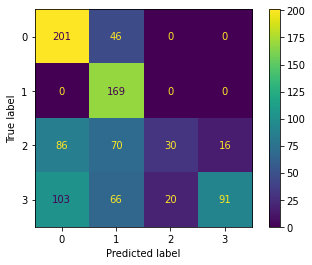

precision :  0.5973048175608417
recall :  0.5171778431212394
f1_score : 0.43575209349446736

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


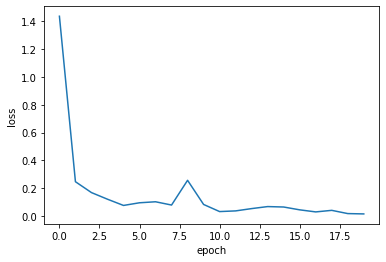

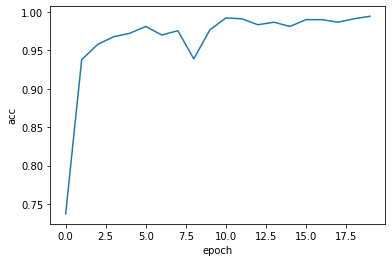

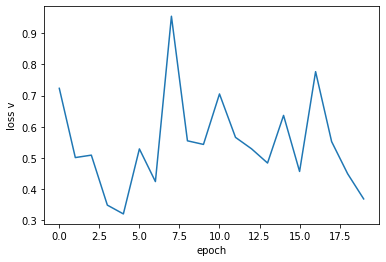

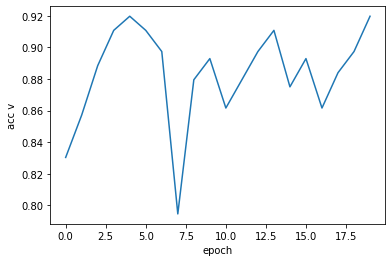

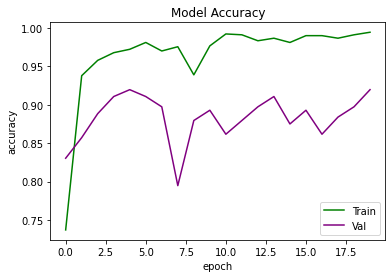

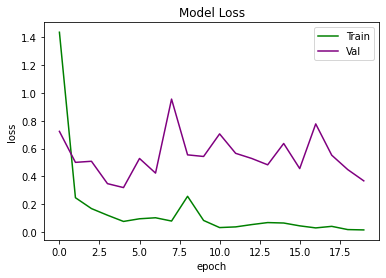

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(250,250,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )


base_model.trainable = False

model_inc = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="softmax")])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_inc.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_inc.summary()


history = model_inc.fit(train_generator ,
         validation_data = validation_generator ,
         epochs = 20 ,shuffle=True,batch_size=10 # valid_files/batch_size
        )
#history = model_inc.fit(train_generator ,
    #    validation_data = validation_generator ,
    #      epochs = 20 ,shuffle=True,
    #    batch_size=10 # valid_files/batch_size
    #     )
#predict on valid set
y_predict=model_inc.predict(x_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model_inc.predict(x_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()
# Training




# **k-fold**

# model 7 max pooling k fold

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_850 (Conv2D)         (None, 125, 125, 32)      1568      
                                                                 
 activation_852 (Activation)  (None, 125, 125, 32)     0         
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_851 (Conv2D)         (None, 31, 31, 32)        16416     
                                                                 
 activation_853 (Activation)  (None, 31, 31, 32)       0         
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                

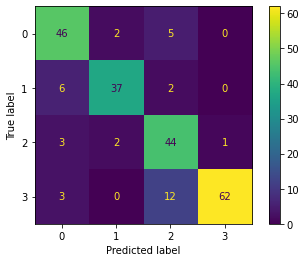

confusion_matrix train fold1: 
[[244   0   3   0]
 [  9 160   0   0]
 [  0   0 202   0]
 [  1   0  21 258]]


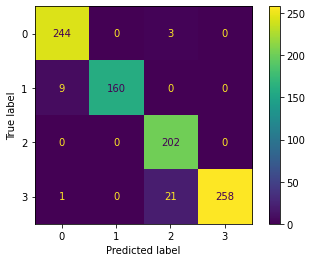

Accuracy fold 2: 0.840000
precision fold2: 0.8302898550724638
recall fold2: 0.832956791636037
F1_score fold2: 0.8315397723280162
confusion_matrix test fold2: 
[[45  3  5  0]
 [ 3 39  3  0]
 [ 5  3 36  6]
 [ 1  1  6 69]]


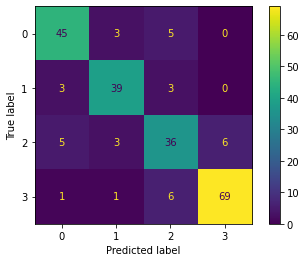

confusion_matrix train fold2: 
[[245   2   0   0]
 [  0 168   1   0]
 [  0   0 202   0]
 [  0   0   0 280]]


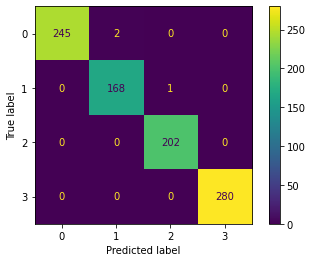

Accuracy fold 3: 0.791111
precision fold3: 0.8059204839484881
recall fold3: 0.774133518473141
F1_score fold3: 0.7760445450675335
confusion_matrix test fold3: 
[[49  1  2  1]
 [12 31  1  1]
 [13  4 30  3]
 [ 5  0  4 68]]


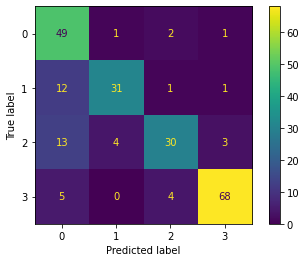

confusion_matrix train fold3: 
[[247   0   0   0]
 [ 34 134   1   0]
 [  4   0 198   0]
 [  1   0   0 279]]


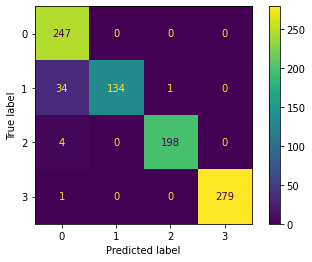

Accuracy fold 4: 0.835556
precision fold4: 0.829034392154363
recall fold4: 0.822054915734161
F1_score fold4: 0.8158322677007634
confusion_matrix test fold4: 
[[45  6  2  0]
 [ 3 41  1  0]
 [15  5 29  1]
 [ 1  1  2 73]]


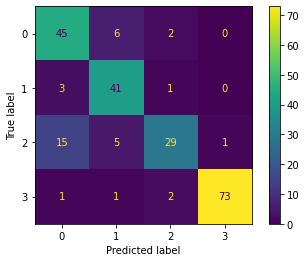

confusion_matrix train fold4: 
[[239   7   0   1]
 [  0 169   0   0]
 [  7   0 194   1]
 [  0   0   0 280]]


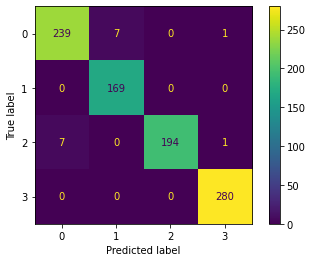

Accuracy fold 5: 0.826667
precision fold5: 0.8356926406926407
recall fold5: 0.8119240926788096
F1_score fold5: 0.8101835085350475
confusion_matrix test fold5: 
[[50  2  1  0]
 [ 6 37  1  1]
 [16  3 28  3]
 [ 3  0  3 71]]


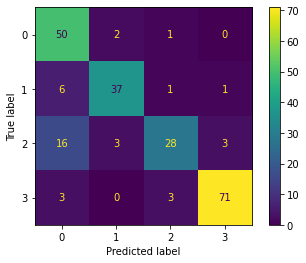

confusion_matrix train fold5: 
[[247   0   0   0]
 [  5 164   0   0]
 [ 22   0 174   6]
 [  1   0   0 279]]


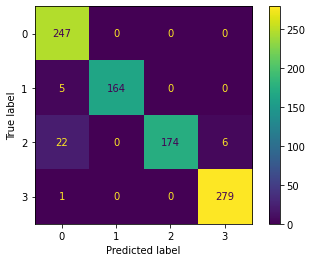

In [ ]:
from sklearn.model_selection import KFold

cfmatrix_val= []
cfmatrix_train =[]
precision =[]
recall= []
F1_score = []
accuracy = []
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(X, y):
  model = Sequential()

  model.add(Conv2D(32, (4, 4),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (4, 4),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(4))
  model.add(Activation('softmax'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

 # model.compile(loss='sparse_categorical_crossentropy',
        #      optimizer=opt,
           #   metrics=['accuracy'])

  # Generate a print
  #print('------------------------------------------------------------------------')
  #print(f'Training for fold {fold_no} ...')

  #history = model.fit(X[train], y[train],validation_data=(X_val, y_val),
             # batch_size=10 ,epochs=100,
             # verbose=1)


  predict_val = model.predict(x_val) #Predictions on Testing data
  predict_val = np.argmax(predict_val, axis = 1)
  #Generate the confusion matrix
  cfmatrix_val.append(confusion_matrix(y_val, predict_val))

  predict_train = model.predict(x_train) #Predictions on Training data
  predict_train = np.argmax(predict_train, axis = 1)
  #Generate the confusion matrix
  cfmatrix_train.append(confusion_matrix(y_train, predict_train))


  precision.append(precision_score(y_val, predict_val , average="macro"))
  recall.append(recall_score(y_val, predict_val , average="macro"))
  F1_score.append(f1_score(y_val, predict_val , average="macro"))
  accuracy.append(accuracy_score(y_val, predict_val))

  # Print the precision and recall and f1, among other metrics

  # Increase fold number
  fold_no = fold_no + 1


#print for each fold

print('Accuracy fold 1: %f' % accuracy[0])
print("precision fold1: " + str(precision[0]))
print("recall fold1: " + str(recall[0]))
print("F1_score fold1: " + str(F1_score[0]))
print("confusion_matrix test fold1: ")
print(cfmatrix_val[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[0])
disp.plot()
plt.show()

print("confusion_matrix train fold1: ")
print(cfmatrix_train[0])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[0])
disp.plot()
plt.show()

print('Accuracy fold 2: %f' % accuracy[1])
print("precision fold2: " + str(precision[1]))
print("recall fold2: " + str(recall[1]))
print("F1_score fold2: " + str(F1_score[1]))
print("confusion_matrix test fold2: ")
print(cfmatrix_val[1])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[1])
disp.plot()
plt.show()

print("confusion_matrix train fold2: ")
print(cfmatrix_train[1])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[1])
disp.plot()
plt.show()

print('Accuracy fold 3: %f' % accuracy[2])
print("precision fold3: " + str(precision[2]))
print("recall fold3: " + str(recall[2]))
print("F1_score fold3: " + str(F1_score[2]))
print("confusion_matrix test fold3: ")
print(cfmatrix_val[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[2])
disp.plot()
plt.show()

print("confusion_matrix train fold3: ")
print(cfmatrix_train[2])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[2])
disp.plot()
plt.show()


print('Accuracy fold 4: %f' % accuracy[3])
print("precision fold4: " + str(precision[3]))
print("recall fold4: " + str(recall[3]))
print("F1_score fold4: " + str(F1_score[3]))
print("confusion_matrix test fold4: ")
print(cfmatrix_val[3])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[3])
disp.plot()
plt.show()

print("confusion_matrix train fold4: ")
print(cfmatrix_train[3])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[3])
disp.plot()
plt.show()

print('Accuracy fold 5: %f' % accuracy[4])
print("precision fold5: " + str(precision[4]))
print("recall fold5: " + str(recall[4]))
print("F1_score fold5: " + str(F1_score[4]))
print("confusion_matrix test fold5: ")
print(cfmatrix_val[4])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[4])
disp.plot()
plt.show()

print("confusion_matrix train fold5: ")
print(cfmatrix_train[4])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[4])
disp.plot()
plt.show()


# model 6 max pooling k fold

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_860 (Conv2D)         (None, 125, 125, 32)      896       
                                                                 
 activation_867 (Activation)  (None, 125, 125, 32)     0         
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_861 (Conv2D)         (None, 31, 31, 32)        9248      
                                                                 
 activation_868 (Activation)  (None, 31, 31, 32)       0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                

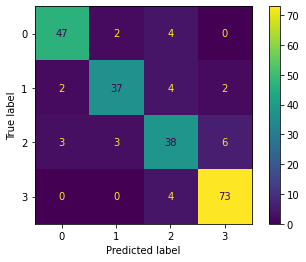

confusion_matrix train fold1: 
[[241   0   0   6]
 [  3 165   0   1]
 [  0   0 202   0]
 [  0   0   0 280]]


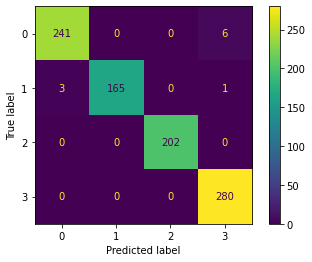

Accuracy fold 2: 0.831111
precision fold2: 0.8221954096954097
recall fold2: 0.8215521794767078
F1_score fold2: 0.81862918090963
confusion_matrix test fold2: 
[[48  2  3  0]
 [ 4 38  2  1]
 [10  4 32  4]
 [ 2  1  5 69]]


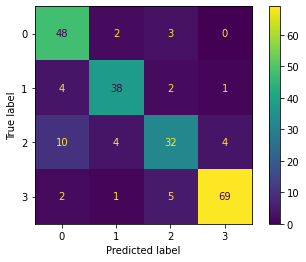

confusion_matrix train fold2: 
[[247   0   0   0]
 [  1 168   0   0]
 [  0   0 202   0]
 [  1   0   0 279]]


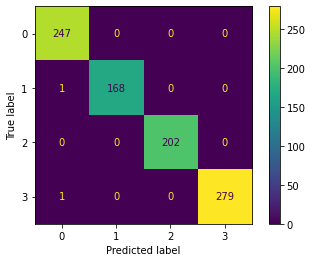

Accuracy fold 3: 0.844444
precision fold3: 0.843736722584426
recall fold3: 0.8334048027444254
F1_score fold3: 0.833747590824619
confusion_matrix test fold3: 
[[49  1  3  0]
 [ 7 36  1  1]
 [11  2 35  2]
 [ 1  1  5 70]]


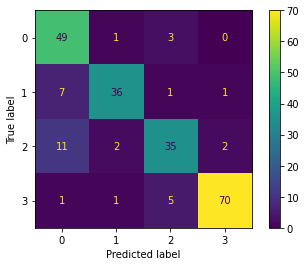

confusion_matrix train fold3: 
[[247   0   0   0]
 [  4 165   0   0]
 [  0   0 202   0]
 [  0   0   0 280]]


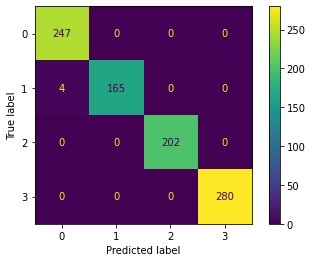

Accuracy fold 4: 0.853333
precision fold4: 0.8426672770608068
recall fold4: 0.8468351983446323
F1_score fold4: 0.8428410108910496
confusion_matrix test fold4: 
[[47  3  3  0]
 [ 6 38  1  0]
 [ 7  5 38  0]
 [ 1  1  6 69]]


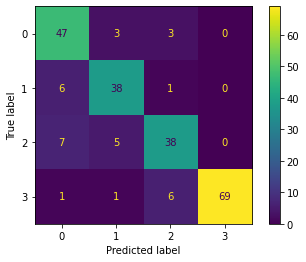

confusion_matrix train fold4: 
[[246   0   1   0]
 [  3 166   0   0]
 [  0   0 202   0]
 [  0   0   2 278]]


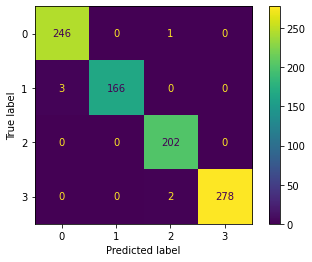

Accuracy fold 5: 0.786667
precision fold5: 0.792294096854012
recall fold5: 0.7744926352473522
F1_score fold5: 0.7641152828652829
confusion_matrix test fold5: 
[[50  2  1  0]
 [ 6 38  1  0]
 [23  5 22  0]
 [ 3  1  6 67]]


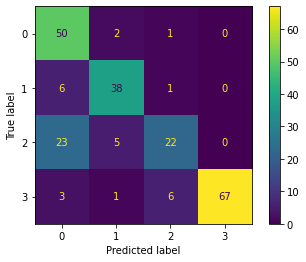

confusion_matrix train fold5: 
[[247   0   0   0]
 [  4 165   0   0]
 [ 19   0 183   0]
 [ 16   0   0 264]]


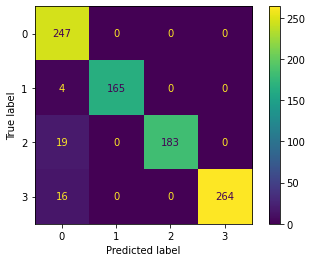

In [ ]:
from sklearn.model_selection import KFold

cfmatrix_val= []
cfmatrix_train =[]
precision =[]
recall= []
F1_score = []
accuracy = []
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(X, y):
  model = Sequential()

  model.add(Conv2D(32, (3, 3),strides=(2, 2), padding="same", dilation_rate=(1, 1), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3),strides=(2, 2),padding="same",dilation_rate=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(4))
  model.add(Activation('softmax'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

 # model.compile(loss='sparse_categorical_crossentropy',
        #      optimizer=opt,
           #   metrics=['accuracy'])

  # Generate a print
  #print('------------------------------------------------------------------------')
  #print(f'Training for fold {fold_no} ...')

  #history = model.fit(X[train], y[train],validation_data=(X_val, y_val),
             # batch_size=10 ,epochs=100,
             # verbose=1)


  predict_val = model.predict(x_val) #Predictions on Testing data
  predict_val = np.argmax(predict_val, axis = 1)
  #Generate the confusion matrix
  cfmatrix_val.append(confusion_matrix(y_val, predict_val))

  predict_train = model.predict(x_train) #Predictions on Training data
  predict_train = np.argmax(predict_train, axis = 1)
  #Generate the confusion matrix
  cfmatrix_train.append(confusion_matrix(y_train, predict_train))


  precision.append(precision_score(y_val, predict_val , average="macro"))
  recall.append(recall_score(y_val, predict_val , average="macro"))
  F1_score.append(f1_score(y_val, predict_val , average="macro"))
  accuracy.append(accuracy_score(y_val, predict_val))

  # Print the precision and recall and f1, among other metrics

  # Increase fold number
  fold_no = fold_no + 1


#print for each fold

print('Accuracy fold 1: %f' % accuracy[0])
print("precision fold1: " + str(precision[0]))
print("recall fold1: " + str(recall[0]))
print("F1_score fold1: " + str(F1_score[0]))
print("confusion_matrix test fold1: ")
print(cfmatrix_val[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[0])
disp.plot()
plt.show()

print("confusion_matrix train fold1: ")
print(cfmatrix_train[0])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[0])
disp.plot()
plt.show()

print('Accuracy fold 2: %f' % accuracy[1])
print("precision fold2: " + str(precision[1]))
print("recall fold2: " + str(recall[1]))
print("F1_score fold2: " + str(F1_score[1]))
print("confusion_matrix test fold2: ")
print(cfmatrix_val[1])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[1])
disp.plot()
plt.show()

print("confusion_matrix train fold2: ")
print(cfmatrix_train[1])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[1])
disp.plot()
plt.show()

print('Accuracy fold 3: %f' % accuracy[2])
print("precision fold3: " + str(precision[2]))
print("recall fold3: " + str(recall[2]))
print("F1_score fold3: " + str(F1_score[2]))
print("confusion_matrix test fold3: ")
print(cfmatrix_val[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[2])
disp.plot()
plt.show()

print("confusion_matrix train fold3: ")
print(cfmatrix_train[2])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[2])
disp.plot()
plt.show()


print('Accuracy fold 4: %f' % accuracy[3])
print("precision fold4: " + str(precision[3]))
print("recall fold4: " + str(recall[3]))
print("F1_score fold4: " + str(F1_score[3]))
print("confusion_matrix test fold4: ")
print(cfmatrix_val[3])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[3])
disp.plot()
plt.show()

print("confusion_matrix train fold4: ")
print(cfmatrix_train[3])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[3])
disp.plot()
plt.show()

print('Accuracy fold 5: %f' % accuracy[4])
print("precision fold5: " + str(precision[4]))
print("recall fold5: " + str(recall[4]))
print("F1_score fold5: " + str(F1_score[4]))
print("confusion_matrix test fold5: ")
print(cfmatrix_val[4])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[4])
disp.plot()
plt.show()

print("confusion_matrix train fold5: ")
print(cfmatrix_train[4])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[4])
disp.plot()
plt.show()


# model 1 max pooling k fold

In [ ]:
from sklearn.model_selection import KFold

cfmatrix_val= []
cfmatrix_train =[]
precision =[]
recall= []
F1_score = []
accuracy = []
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(X, y):

  model = Sequential()

  model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid",dilation_rate=(1, 1),
  input_shape=x_train.shape[1:]))

  model.add(Activation('relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3),strides=(1, 1),padding="valid", dilation_rate=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(4))
  model.add(Activation('softmax'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history=model.fit(x_train , y_train,validation_data=(x_val,y_val), batch_size=10, epochs=20)  # train the model

 # model.compile(loss='sparse_categorical_crossentropy',
        #      optimizer=opt,
           #   metrics=['accuracy'])

  # Generate a print
  #print('------------------------------------------------------------------------')
  #print(f'Training for fold {fold_no} ...')

  #history = model.fit(X[train], y[train],validation_data=(X_val, y_val),
             # batch_size=10 ,epochs=100,
             # verbose=1)


  predict_val = model.predict(x_val) #Predictions on Testing data
  predict_val = np.argmax(predict_val, axis = 1)
  #Generate the confusion matrix
  cfmatrix_val.append(confusion_matrix(y_val, predict_val))

  predict_train = model.predict(x_train) #Predictions on Training data
  predict_train = np.argmax(predict_train, axis = 1)
  #Generate the confusion matrix
  cfmatrix_train.append(confusion_matrix(y_train, predict_train))


  precision.append(precision_score(y_val, predict_val , average="macro"))
  recall.append(recall_score(y_val, predict_val , average="macro"))
  F1_score.append(f1_score(y_val, predict_val , average="macro"))
  accuracy.append(accuracy_score(y_val, predict_val))

  # Print the precision and recall and f1, among other metrics

  # Increase fold number
  fold_no = fold_no + 1


#print for each fold

print('Accuracy fold 1: %f' % accuracy[0])
print("precision fold1: " + str(precision[0]))
print("recall fold1: " + str(recall[0]))
print("F1_score fold1: " + str(F1_score[0]))
print("confusion_matrix test fold1: ")
print(cfmatrix_val[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[0])
disp.plot()
plt.show()

print("confusion_matrix train fold1: ")
print(cfmatrix_train[0])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[0])
disp.plot()
plt.show()

print('Accuracy fold 2: %f' % accuracy[1])
print("precision fold2: " + str(precision[1]))
print("recall fold2: " + str(recall[1]))
print("F1_score fold2: " + str(F1_score[1]))
print("confusion_matrix test fold2: ")
print(cfmatrix_val[1])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[1])
disp.plot()
plt.show()

print("confusion_matrix train fold2: ")
print(cfmatrix_train[1])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[1])
disp.plot()
plt.show()

print('Accuracy fold 3: %f' % accuracy[2])
print("precision fold3: " + str(precision[2]))
print("recall fold3: " + str(recall[2]))
print("F1_score fold3: " + str(F1_score[2]))
print("confusion_matrix test fold3: ")
print(cfmatrix_val[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[2])
disp.plot()
plt.show()

print("confusion_matrix train fold3: ")
print(cfmatrix_train[2])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[2])
disp.plot()
plt.show()


print('Accuracy fold 4: %f' % accuracy[3])
print("precision fold4: " + str(precision[3]))
print("recall fold4: " + str(recall[3]))
print("F1_score fold4: " + str(F1_score[3]))
print("confusion_matrix test fold4: ")
print(cfmatrix_val[3])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[3])
disp.plot()
plt.show()

print("confusion_matrix train fold4: ")
print(cfmatrix_train[3])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[3])
disp.plot()
plt.show()

print('Accuracy fold 5: %f' % accuracy[4])
print("precision fold5: " + str(precision[4]))
print("recall fold5: " + str(recall[4]))
print("F1_score fold5: " + str(F1_score[4]))
print("confusion_matrix test fold5: ")
print(cfmatrix_val[4])
disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_val[4])
disp.plot()
plt.show()

print("confusion_matrix train fold5: ")
print(cfmatrix_train[4])

disp = ConfusionMatrixDisplay(confusion_matrix=cfmatrix_train[4])
disp.plot()
plt.show()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_870 (Conv2D)         (None, 248, 248, 32)      896       
                                                                 
 activation_882 (Activation)  (None, 248, 248, 32)     0         
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_871 (Conv2D)         (None, 122, 122, 32)      9248      
                                                                 
 activation_883 (Activation)  (None, 122, 122, 32)     0         
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                